In [1]:
EXPERIMENT_NOTEBOOK_PATH = "../../reports/experiments/2019-02-04_21-34/notebook.csv"


In [2]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Load

In [3]:
exp_df = pd.read_csv(EXPERIMENT_NOTEBOOK_PATH)
exp_df.head()

acc   loss  val_acc  val_loss  trial_no aug1_type  aug1_magnitude  \
0  0.099  2.314    0.151     2.289         1   dropout           0.844   
1  0.134  2.271    0.168     2.191         1   dropout           0.844   
2  0.166  2.192    0.244     2.139         1   dropout           0.844   
3  0.203  2.126    0.236     2.039         1   dropout           0.844   
4  0.224  2.071    0.269     1.920         1   dropout           0.844   

  aug2_type  aug2_magnitude aug3_type  aug3_magnitude  portion  sample_no  \
0    invert           0.847   dropout           0.384    0.298          1   
1    invert           0.847   dropout           0.384    0.298          1   
2    invert           0.847   dropout           0.384    0.298          1   
3    invert           0.847   dropout           0.384    0.298          1   
4    invert           0.847   dropout           0.384    0.298          1   

   mean_late_val_acc  epoch  
0              0.492      1  
1              0.492      2  
2              0.492      3  
3              0.492      4  
4              0.492      5

## Preprocess

### correct name of reward

In [4]:
exp_df.rename(columns={"mean_late_val_acc":"reward"}, inplace=True)
exp_df.head()

acc   loss  val_acc  val_loss  trial_no aug1_type  aug1_magnitude  \
0  0.099  2.314    0.151     2.289         1   dropout           0.844   
1  0.134  2.271    0.168     2.191         1   dropout           0.844   
2  0.166  2.192    0.244     2.139         1   dropout           0.844   
3  0.203  2.126    0.236     2.039         1   dropout           0.844   
4  0.224  2.071    0.269     1.920         1   dropout           0.844   

  aug2_type  aug2_magnitude aug3_type  aug3_magnitude  portion  sample_no  \
0    invert           0.847   dropout           0.384    0.298          1   
1    invert           0.847   dropout           0.384    0.298          1   
2    invert           0.847   dropout           0.384    0.298          1   
3    invert           0.847   dropout           0.384    0.298          1   
4    invert           0.847   dropout           0.384    0.298          1   

   reward  epoch  
0   0.492      1  
1   0.492      2  
2   0.492      3  
3   0.492      4  
4   0.492      5

### add epoch info and accuracy overfit

In [5]:
n_epochs = len(exp_df) / len(exp_df["trial_no"].unique()) / len(exp_df["sample_no"].unique())
exp_df["epoch"] = exp_df.index % n_epochs
exp_df["acc_overfit"] = exp_df["acc"] - exp_df["val_acc"]
exp_df.head()

acc   loss  val_acc  val_loss  trial_no aug1_type  aug1_magnitude  \
0  0.099  2.314    0.151     2.289         1   dropout           0.844   
1  0.134  2.271    0.168     2.191         1   dropout           0.844   
2  0.166  2.192    0.244     2.139         1   dropout           0.844   
3  0.203  2.126    0.236     2.039         1   dropout           0.844   
4  0.224  2.071    0.269     1.920         1   dropout           0.844   

  aug2_type  aug2_magnitude aug3_type  aug3_magnitude  portion  sample_no  \
0    invert           0.847   dropout           0.384    0.298          1   
1    invert           0.847   dropout           0.384    0.298          1   
2    invert           0.847   dropout           0.384    0.298          1   
3    invert           0.847   dropout           0.384    0.298          1   
4    invert           0.847   dropout           0.384    0.298          1   

   reward  epoch  acc_overfit  
0   0.492    0.0       -0.052  
1   0.492    1.0       -0.034  
2   0.492    2.0       -0.078  
3   0.492    3.0       -0.033  
4   0.492    4.0       -0.045

## Some info

In [6]:
print (f"number of trials:{exp_df.trial_no.unique().__len__()}")
print (f"number of samples for each trial:{exp_df.sample_no.unique().__len__()}")

number of trials:417
number of samples for each trial:3


In [7]:
color_palette = ["red","blue","chocolate","salmon","green","pink","orange",
                 "purple","magenta","sienna","teal","khaki","yellow","darkgreen",
                 "darkblue", "cyan","tan","yellowgreen","tomato","olive",
                 "navy","ivory","brown","azure", '#e6194b', '#3cb44b', '#ffe119', '#4363d8', 
                 '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', 
                 '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
                 '#000075', '#808080', '#ffffff', '#000000']*30

def plot_exp_lines(exp_df):
    
    #plt.figure(figsize=(20,10))
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,15))
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
    
    rowList = []
    for trial_no in exp_df["trial_no"].unique():
        
        if trial_no<1:
            continue
        
        iter_df = exp_df[exp_df["trial_no"]==trial_no].copy()
        
        exp_color = color_palette[trial_no]
        
        if exp_df[exp_df["trial_no"]==trial_no]["portion"].values[0]==0.0:
            exp_color="black"
        
        mean_last_scores = []
        
        ############################################################
        # Accuracy plot
        ############################################################
        for sample_id in iter_df["sample_no"].unique():
            sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
            xs = np.arange(1,51,1)
            axes[0].plot(xs, sample_df["val_acc"], color=exp_color, alpha=0.5, linewidth=2)
            axes[0].plot(xs, sample_df["acc"], '--',color=exp_color, alpha=0.5, linewidth=1)
            
        axes[0].set_title("validation (straight) and train (dashed) accuracies for child model\n"+\
                  "(each color represents a distinct augmentation strategy) ", fontsize=20)
        axes[0].set_ylabel("accuracy", fontsize=20)
        
        ############################################################
        # Loss plot
        ############################################################
        for sample_id in iter_df["sample_no"].unique():
            sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
            xs = np.arange(1,51,1)
            axes[1].plot(xs, sample_df["val_loss"], color=exp_color, alpha=0.5, linewidth=2)
            axes[1].plot(xs, sample_df["loss"], '--',color=exp_color, alpha=0.5, linewidth=1)
            
        #axes[1].title("validation (straight) and train (dashed) accuracies for child model\n"+\
        #          "(each color represents a distinct augmentation strategy) ", fontsize=20)
        axes[1].set_xlabel("epochs", fontsize=20)
        axes[1].set_ylabel("loss", fontsize=20)
            
        param1 = iter_df["aug1_type"].values[0]
        param2 = iter_df["aug1_magnitude"].values[0]
        param3 = iter_df["aug2_type"].values[0]
        param4 = iter_df["aug2_magnitude"].values[0]
        param5 = iter_df["aug3_type"].values[0]
        param6 = iter_df["aug3_magnitude"].values[0]
        portion = iter_df["portion"].values[0]
        reward = iter_df["reward"].values[0]
        
        rowList.append([trial_no,param1,param2,param3,param4,param5,param6,portion,reward])
        
    ret_df = pd.DataFrame(rowList, columns=[
        "trial_no","aug1_type","aug1_magnitude", "aug2_type","aug2_magnitude","aug3_type","aug3_magnitude","portion", "reward"]) 
    return ret_df.sort_values("reward", ascending=False)

Total number of trials: 417


trial_no       aug1_type  aug1_magnitude       aug2_type  aug2_magnitude  \
221       222           shear           0.793         sharpen           0.411   
83         84  gamma-contrast           0.076         sharpen           1.000   
84         85  gamma-contrast           0.054  coarse-dropout           0.229   
156       157             fog           0.082             fog           0.963   
27         28  gamma-contrast           0.002     translate-y           0.964   
57         58           shear           0.006     translate-y           0.981   
132       133     translate-x           0.141  coarse-dropout           0.008   
66         67           shear           0.964     translate-y           0.508   
2           3     translate-y           0.648     translate-y           0.957   
31         32          emboss           0.019          emboss           0.991   

          aug3_type  aug3_magnitude  portion  reward  
221  gamma-contrast           0.052    0.929   0.556  
83          dropout           0.007    0.941   0.549  
84          sharpen           0.993    0.998   0.547  
156          invert           0.016    0.952   0.541  
27          dropout           0.038    0.918   0.539  
57      translate-y           0.048    0.996   0.538  
132     translate-y           0.970    0.955   0.538  
66          dropout           0.023    0.964   0.536  
2            rotate           0.870    0.474   0.535  
31           clouds           0.058    0.944   0.534

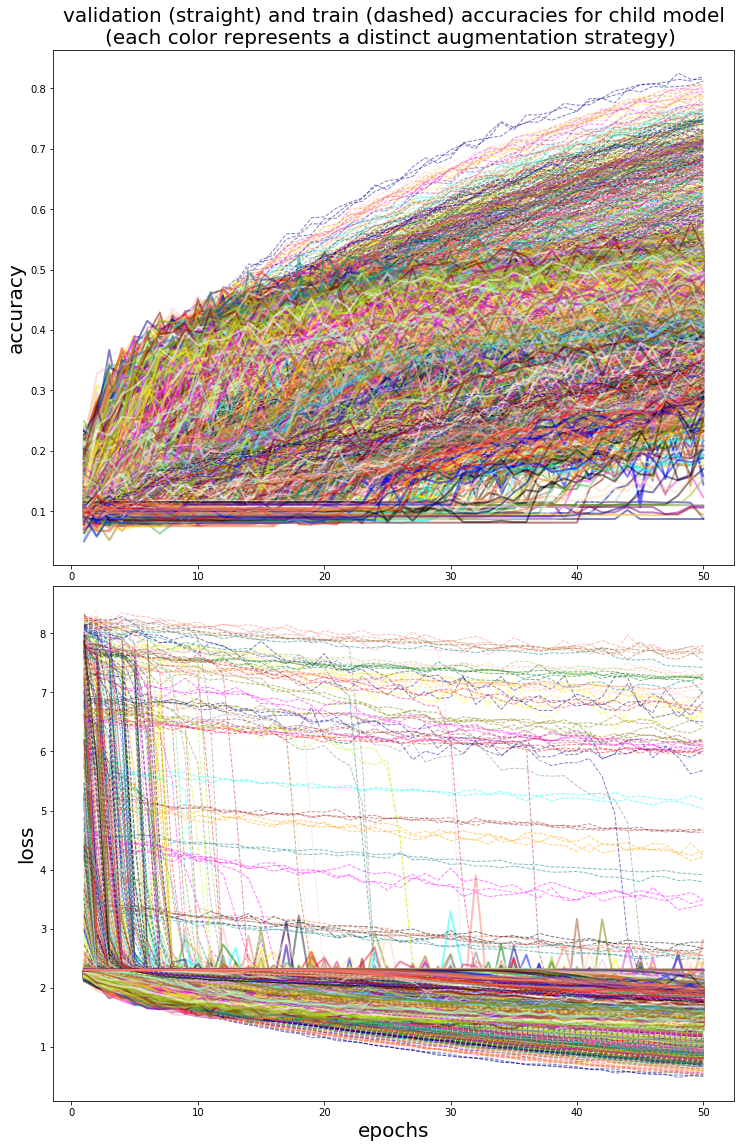

In [8]:
score_df = plot_exp_lines(exp_df)
print (f"Total number of trials: {exp_df.trial_no.unique().__len__()}")
score_df[:10]

## Rewards trend

/Users/baris.ozmen/miniconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


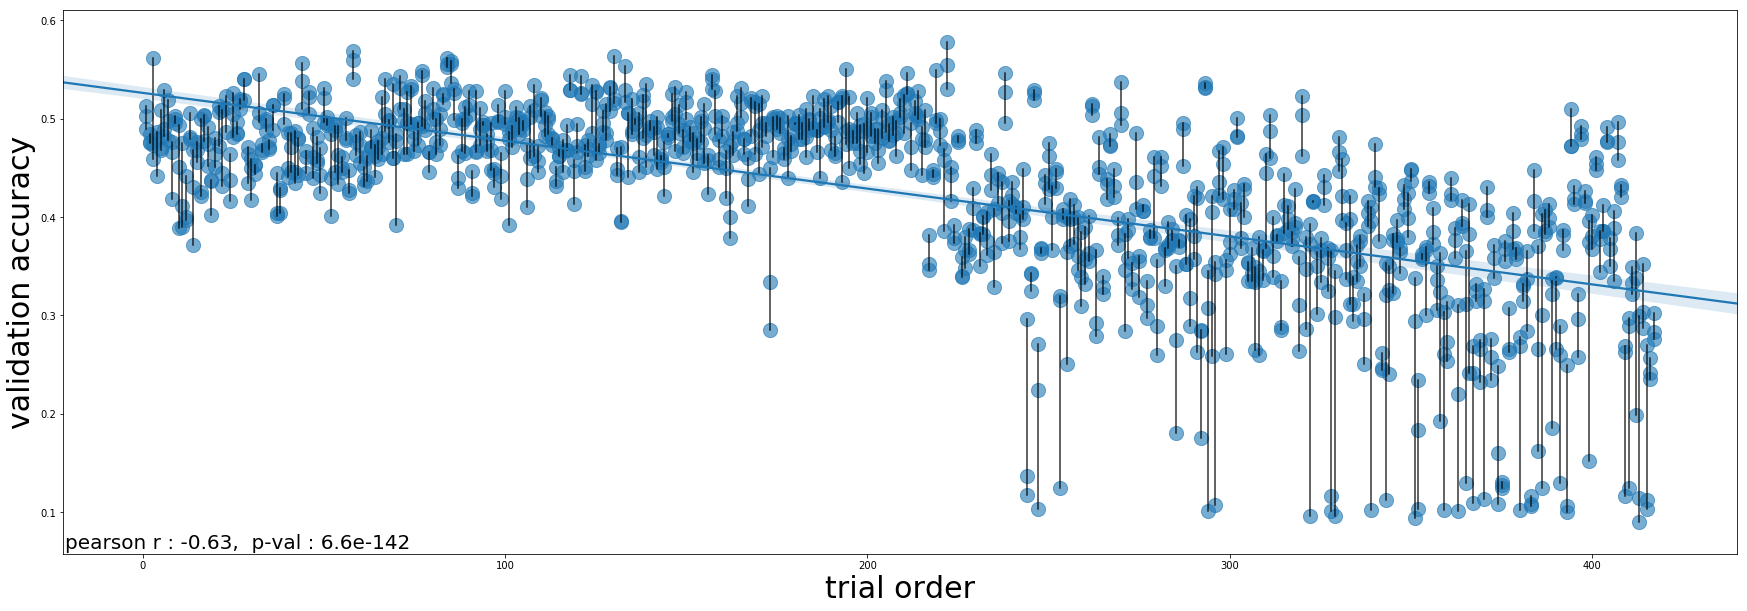

In [9]:
import seaborn as sns

df = (exp_df[exp_df["acc_overfit"]<0.05]
     .sort_values("val_acc", ascending=False)
     .drop_duplicates(["trial_no","sample_no"])
)[["trial_no","val_acc"]]

plt.figure(figsize=(30,10))
for trial_no in df["trial_no"].unique():
    val_accs = df[df["trial_no"]==trial_no]["val_acc"].values
    plt.plot([trial_no, trial_no],[min(val_accs), max(val_accs)], color='black', alpha=0.8)

ax = sns.regplot(x="trial_no", y="val_acc", data=df, scatter_kws={'s':200,'alpha':0.6})

from scipy.stats import pearsonr
r , p = pearsonr(df["trial_no"].values,df["val_acc"].values)

plt.text(plt.xlim()[0]+0.5,plt.ylim()[0]+0.005, f"pearson r : {r:.2},  p-val : {p:.2}", fontsize=20)

plt.xlabel("trial order", fontsize=30)
plt.ylabel("validation accuracy", fontsize=30)

del df

## How frequency of augmented images affect accuracy?

Text(0, 0.5, 'val_acc')

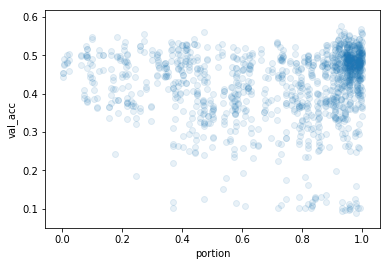

In [10]:
df = (exp_df[exp_df["acc_overfit"]<0.05]
         .sort_values("val_acc", ascending=False)
         .drop_duplicates(["trial_no","sample_no"])
     )[["portion","val_acc"]]

plt.scatter(df["portion"], df["val_acc"], alpha=0.1)
plt.xlabel("portion")
plt.ylabel("val_acc")

In [11]:
exp_df.drop_duplicates("trial_no")["portion"].unique().__len__()

285

# Top 5 policy accuracy curves (they're overfitting for augmentation)

trial_no       aug1_type  aug1_magnitude       aug2_type  aug2_magnitude  \
4       222           shear           0.793         sharpen           0.411   
1        84  gamma-contrast           0.076         sharpen           1.000   
2        85  gamma-contrast           0.054  coarse-dropout           0.229   
3       157             fog           0.082             fog           0.963   
0        28  gamma-contrast           0.002     translate-y           0.964   

        aug3_type  aug3_magnitude  portion  reward  
4  gamma-contrast           0.052    0.929   0.556  
1         dropout           0.007    0.941   0.549  
2         sharpen           0.993    0.998   0.547  
3          invert           0.016    0.952   0.541  
0         dropout           0.038    0.918   0.539

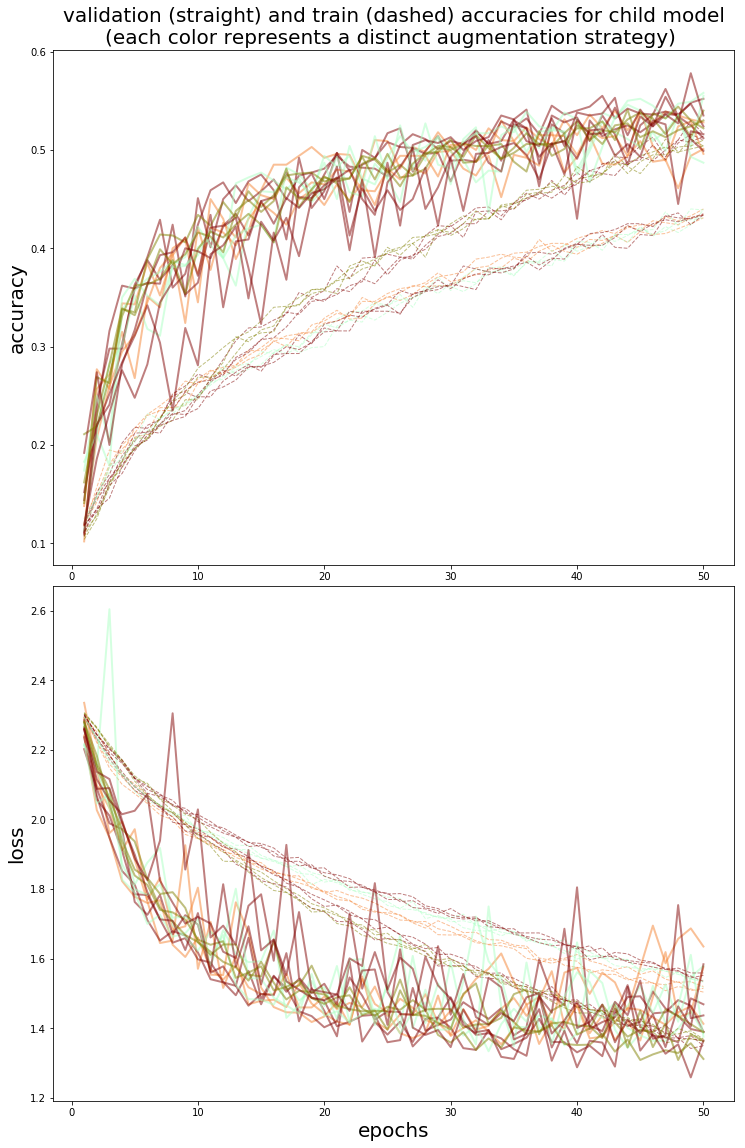

In [12]:
top_policy_trial_no_arr = score_df[:5].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(top_policy_trial_no_arr)])

# Bottom 5 policy accuracy curves

trial_no aug1_type  aug1_magnitude aug2_type  aug2_magnitude  \
0       247    rotate           0.846    invert           0.142   
2       383    rotate           0.237    invert           0.636   
1       328   sharpen           0.119    invert           0.232   
3       393  brighten           0.597    invert           0.810   
4       413   sharpen           0.303    invert           0.825   

        aug3_type  aug3_magnitude  portion  reward  
0  gamma-contrast           0.967    0.719   0.103  
2  gamma-contrast           0.967    0.832   0.103  
1  gamma-contrast           0.898    0.934   0.101  
3  gamma-contrast           0.979    0.961   0.099  
4  gamma-contrast           0.908    0.978   0.087

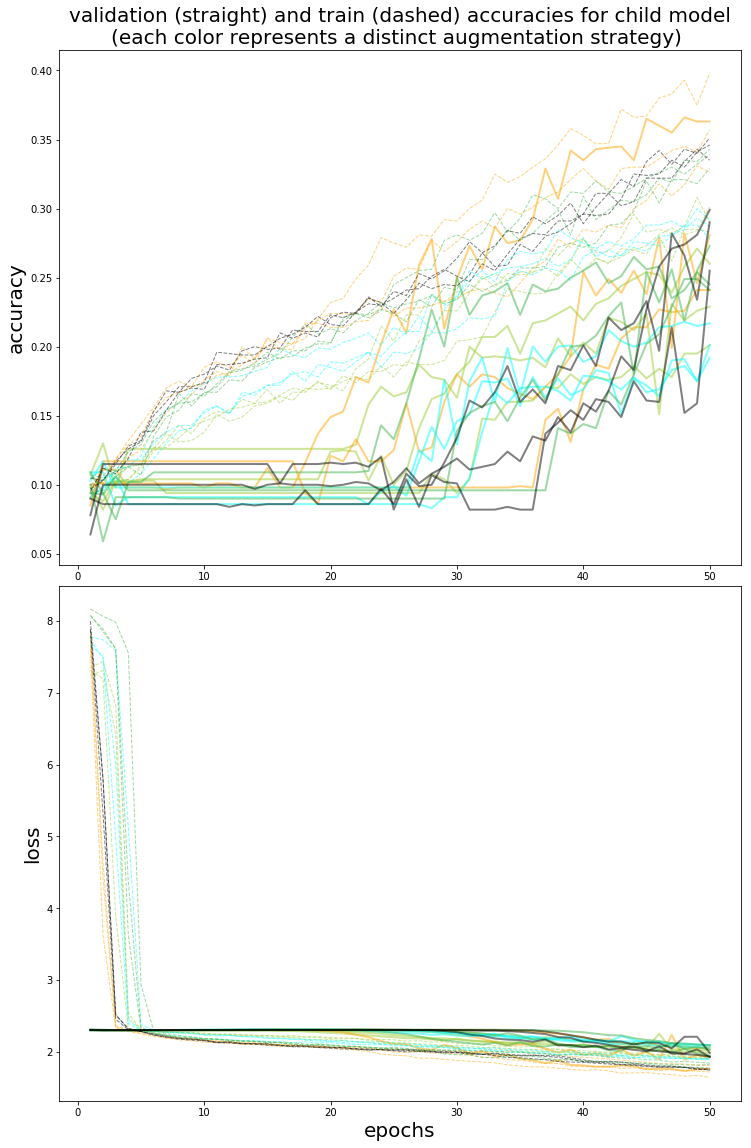

In [13]:
worst_policy_trial_no_arr = score_df[-5:].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(worst_policy_trial_no_arr)])

In [14]:
import sys
sys.path.insert(0,"../../")

from deepaugmenter.augmenter import Augmenter
augmenter=Augmenter()

In [15]:
from PIL import Image

from imgaug import augmenters as iaa

import sys
sys.path.insert(0,"../../")
from deepaugmenter.build_features import DataOp

Using TensorFlow backend.


In [16]:
data, input_shape = DataOp.load("cifar10",1000)
data = DataOp.preprocess(data)

In [28]:
def display_images(X, nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        axes[int(i/ncols)][i%ncols].imshow(im_arr)
        
def display_images_comperatively(X,X_aug,nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%2==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug[i])

            
def display_augmentation_by_trial_no(trial_no, exp_df, data, nrows=2, ncols=4):
    trial_df = exp_df[exp_df["trial_no"]==trial_no]
    trial_hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                         trial_df.iloc[0,7],trial_df.iloc[0,8],
                         trial_df.iloc[0,9],trial_df.iloc[0,10],
                         1.0] # proportion always 1

    aug_data = augmenter.run(data["X_train"], data["y_train"],*trial_hyperparams)

    print (trial_hyperparams)
    display_images_comperatively(data["X_train"], aug_data["X_train"], nrows, ncols)
    
def display_augmentation_by_steps(trial_no, df, data, nrows=4):
    from deepaugmenter.augmenter import transform
    trial_df = df[df["trial_no"]==trial_no]
    
    hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                   trial_df.iloc[0,7],trial_df.iloc[0,8],
                   trial_df.iloc[0,9],trial_df.iloc[0,10],
                   1.0] # proportion always 1
    
    X = data["X_train"]
    X_aug_1 = transform(hyperparams[0], hyperparams[1], X)
    X_aug_2 = transform(hyperparams[2], hyperparams[3], X_aug_1)
    X_aug_3 = transform(hyperparams[4], hyperparams[5], X_aug_2)
    
    ncols=4
    fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(ncols*10,nrows*10))
    fig.tight_layout()
    fig.suptitle("smt")
    
    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%4==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug_1[i])
            axes[int((i+2)/ncols)][(i+2)%ncols].imshow(X_aug_2[i])
            axes[int((i+3)/ncols)][(i+3)%ncols].imshow(X_aug_3[i])
    
    print (hyperparams)

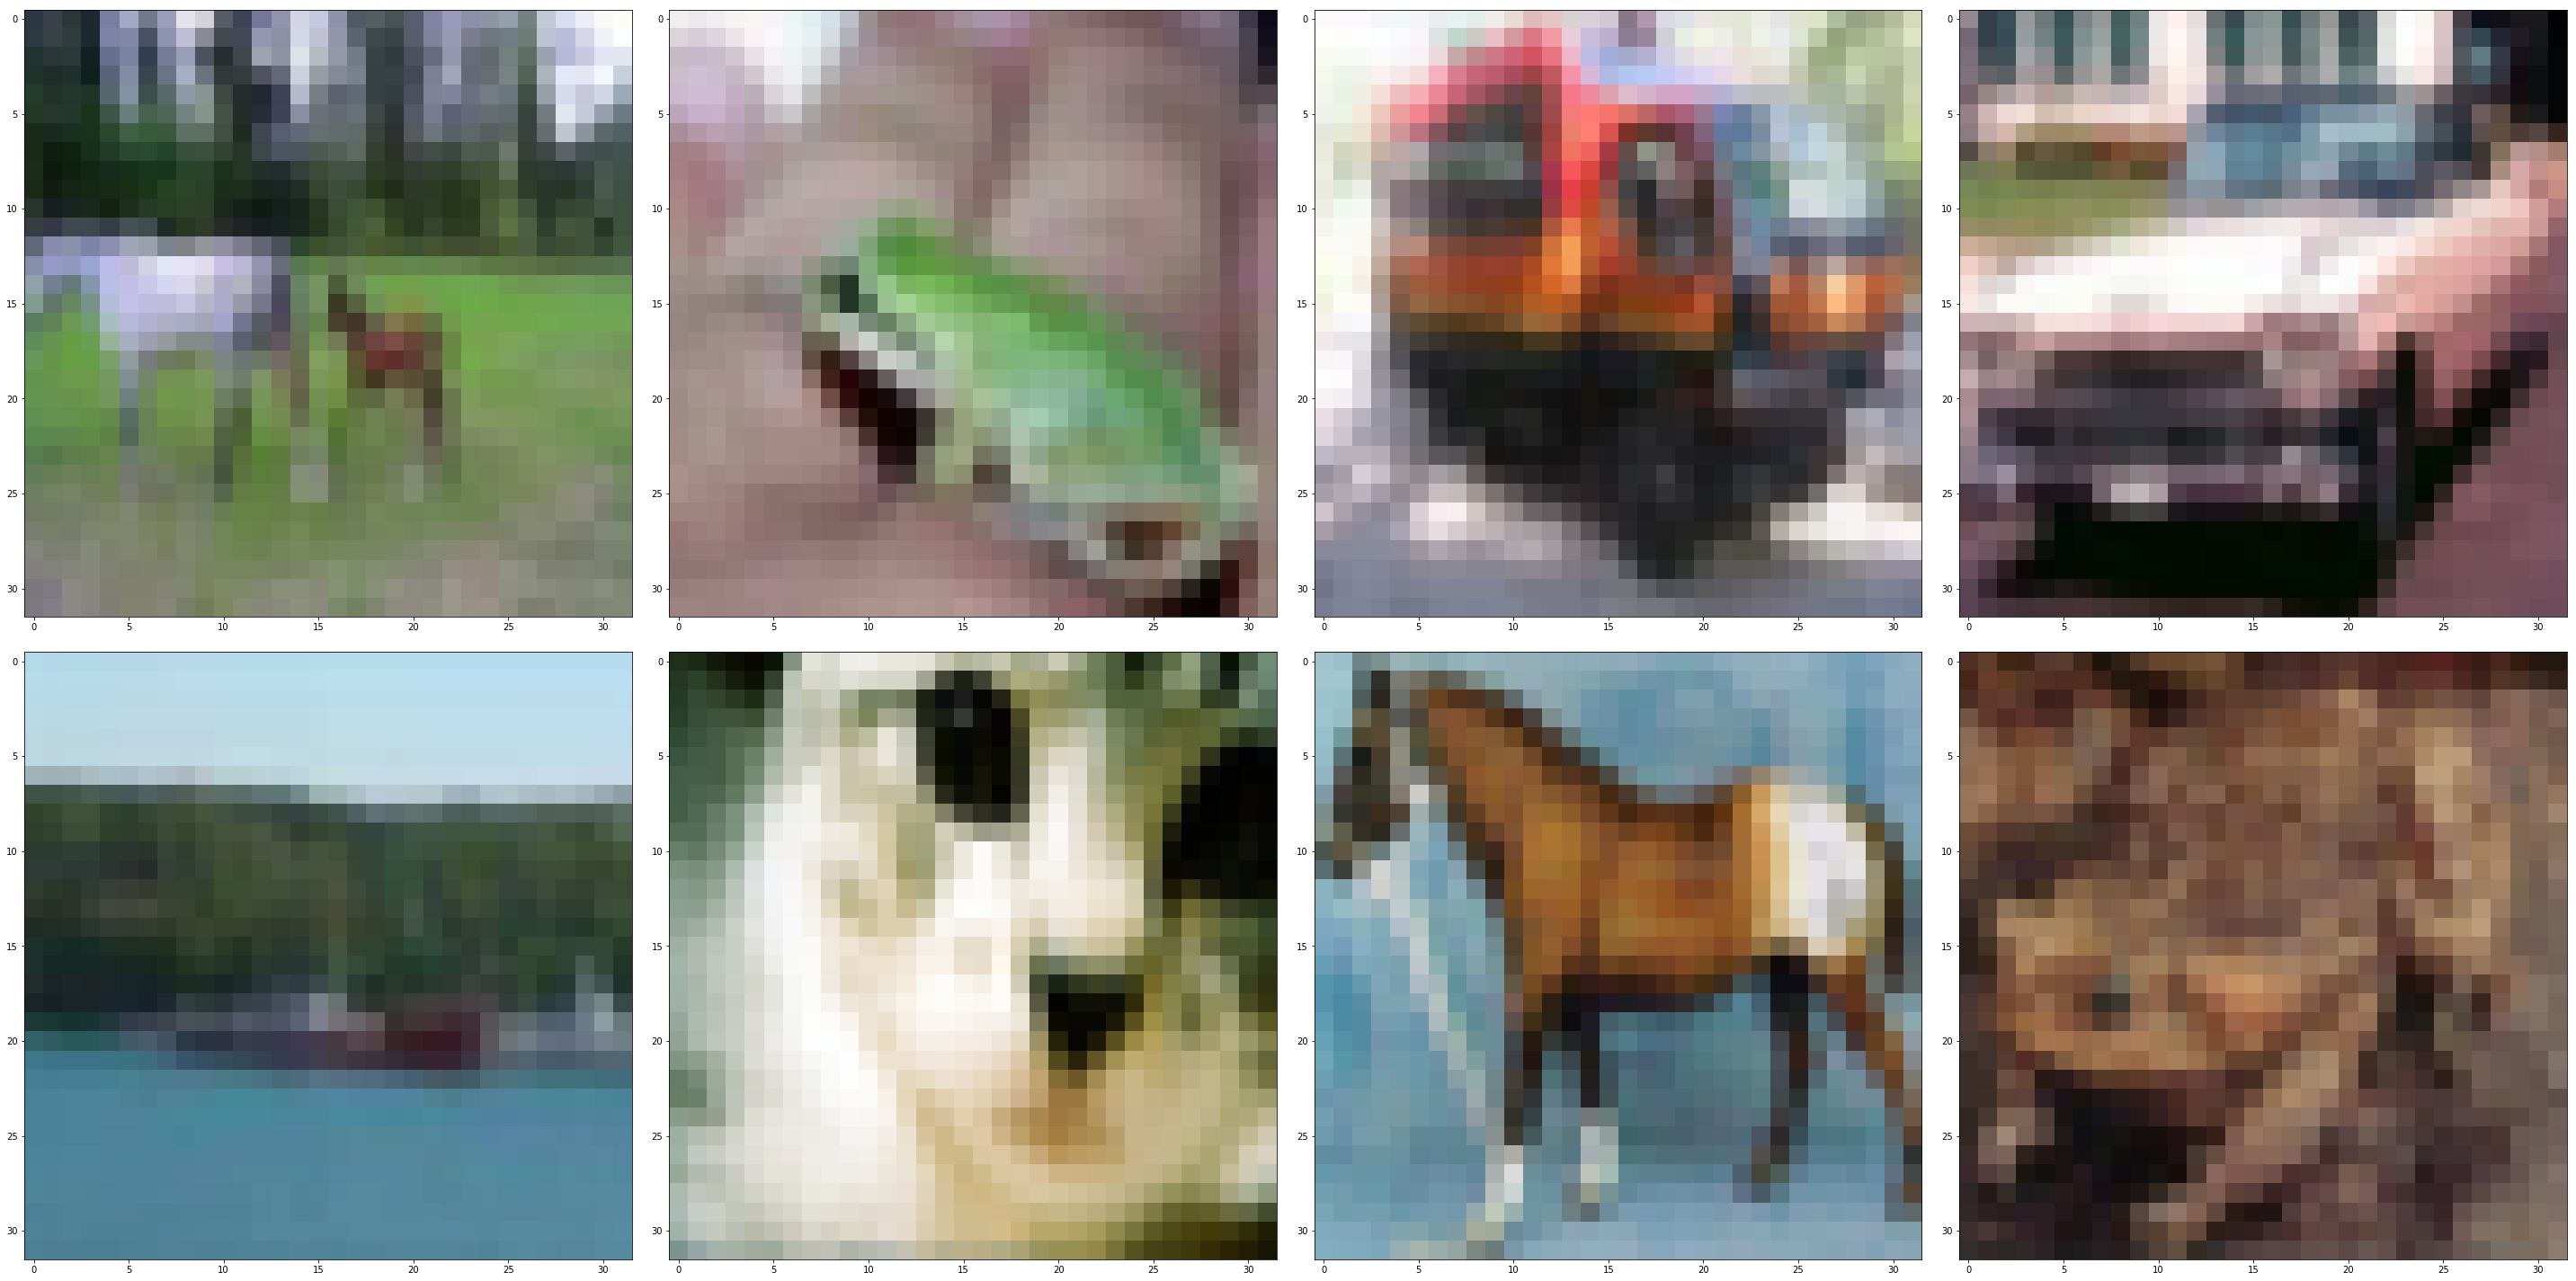

In [18]:
display_images(data["X_train"])

['gaussian-blur', 0.474, 'rotate', 0.737, 'shear', 0.135, 1.0]


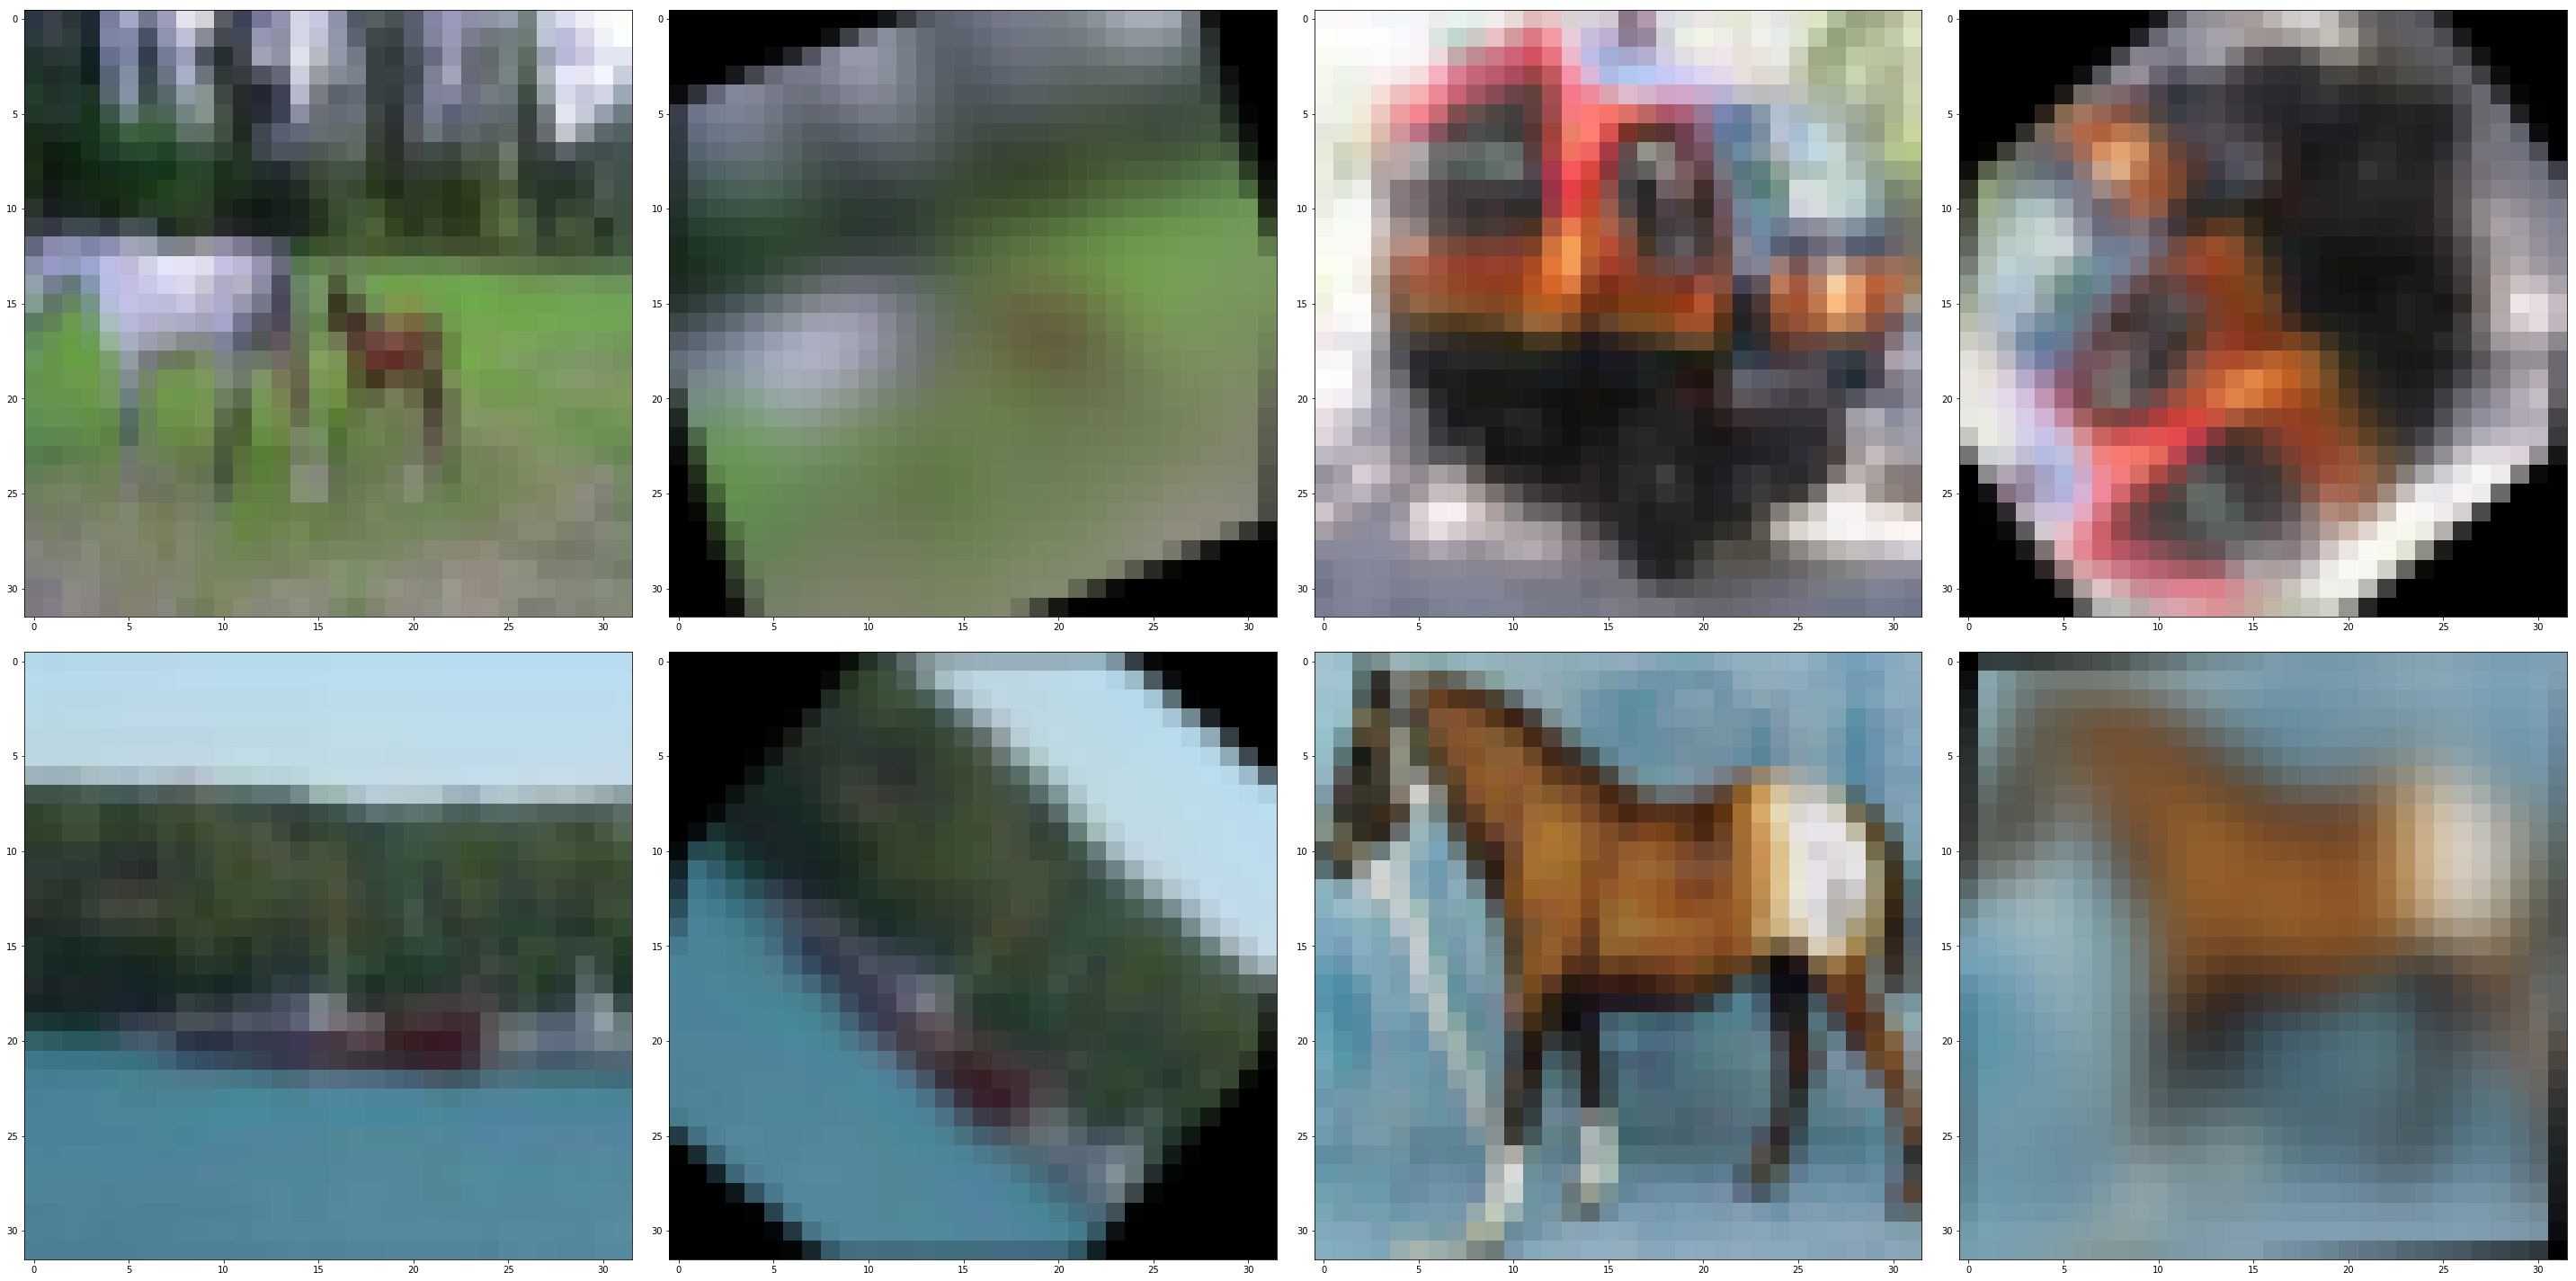

In [19]:
display_augmentation_by_trial_no(5, exp_df, data)

# Overfitting augmentations

222
['shear', 0.7929999999999999, 'sharpen', 0.41100000000000003, 'gamma-contrast', 0.052000000000000005, 1.0]
84
['gamma-contrast', 0.076, 'sharpen', 1.0, 'dropout', 0.006999999999999999, 1.0]
85
['gamma-contrast', 0.054000000000000006, 'coarse-dropout', 0.22899999999999998, 'sharpen', 0.993, 1.0]
157
['fog', 0.08199999999999999, 'fog', 0.963, 'invert', 0.016, 1.0]
28
['gamma-contrast', 0.002, 'translate-y', 0.9640000000000001, 'dropout', 0.038, 1.0]


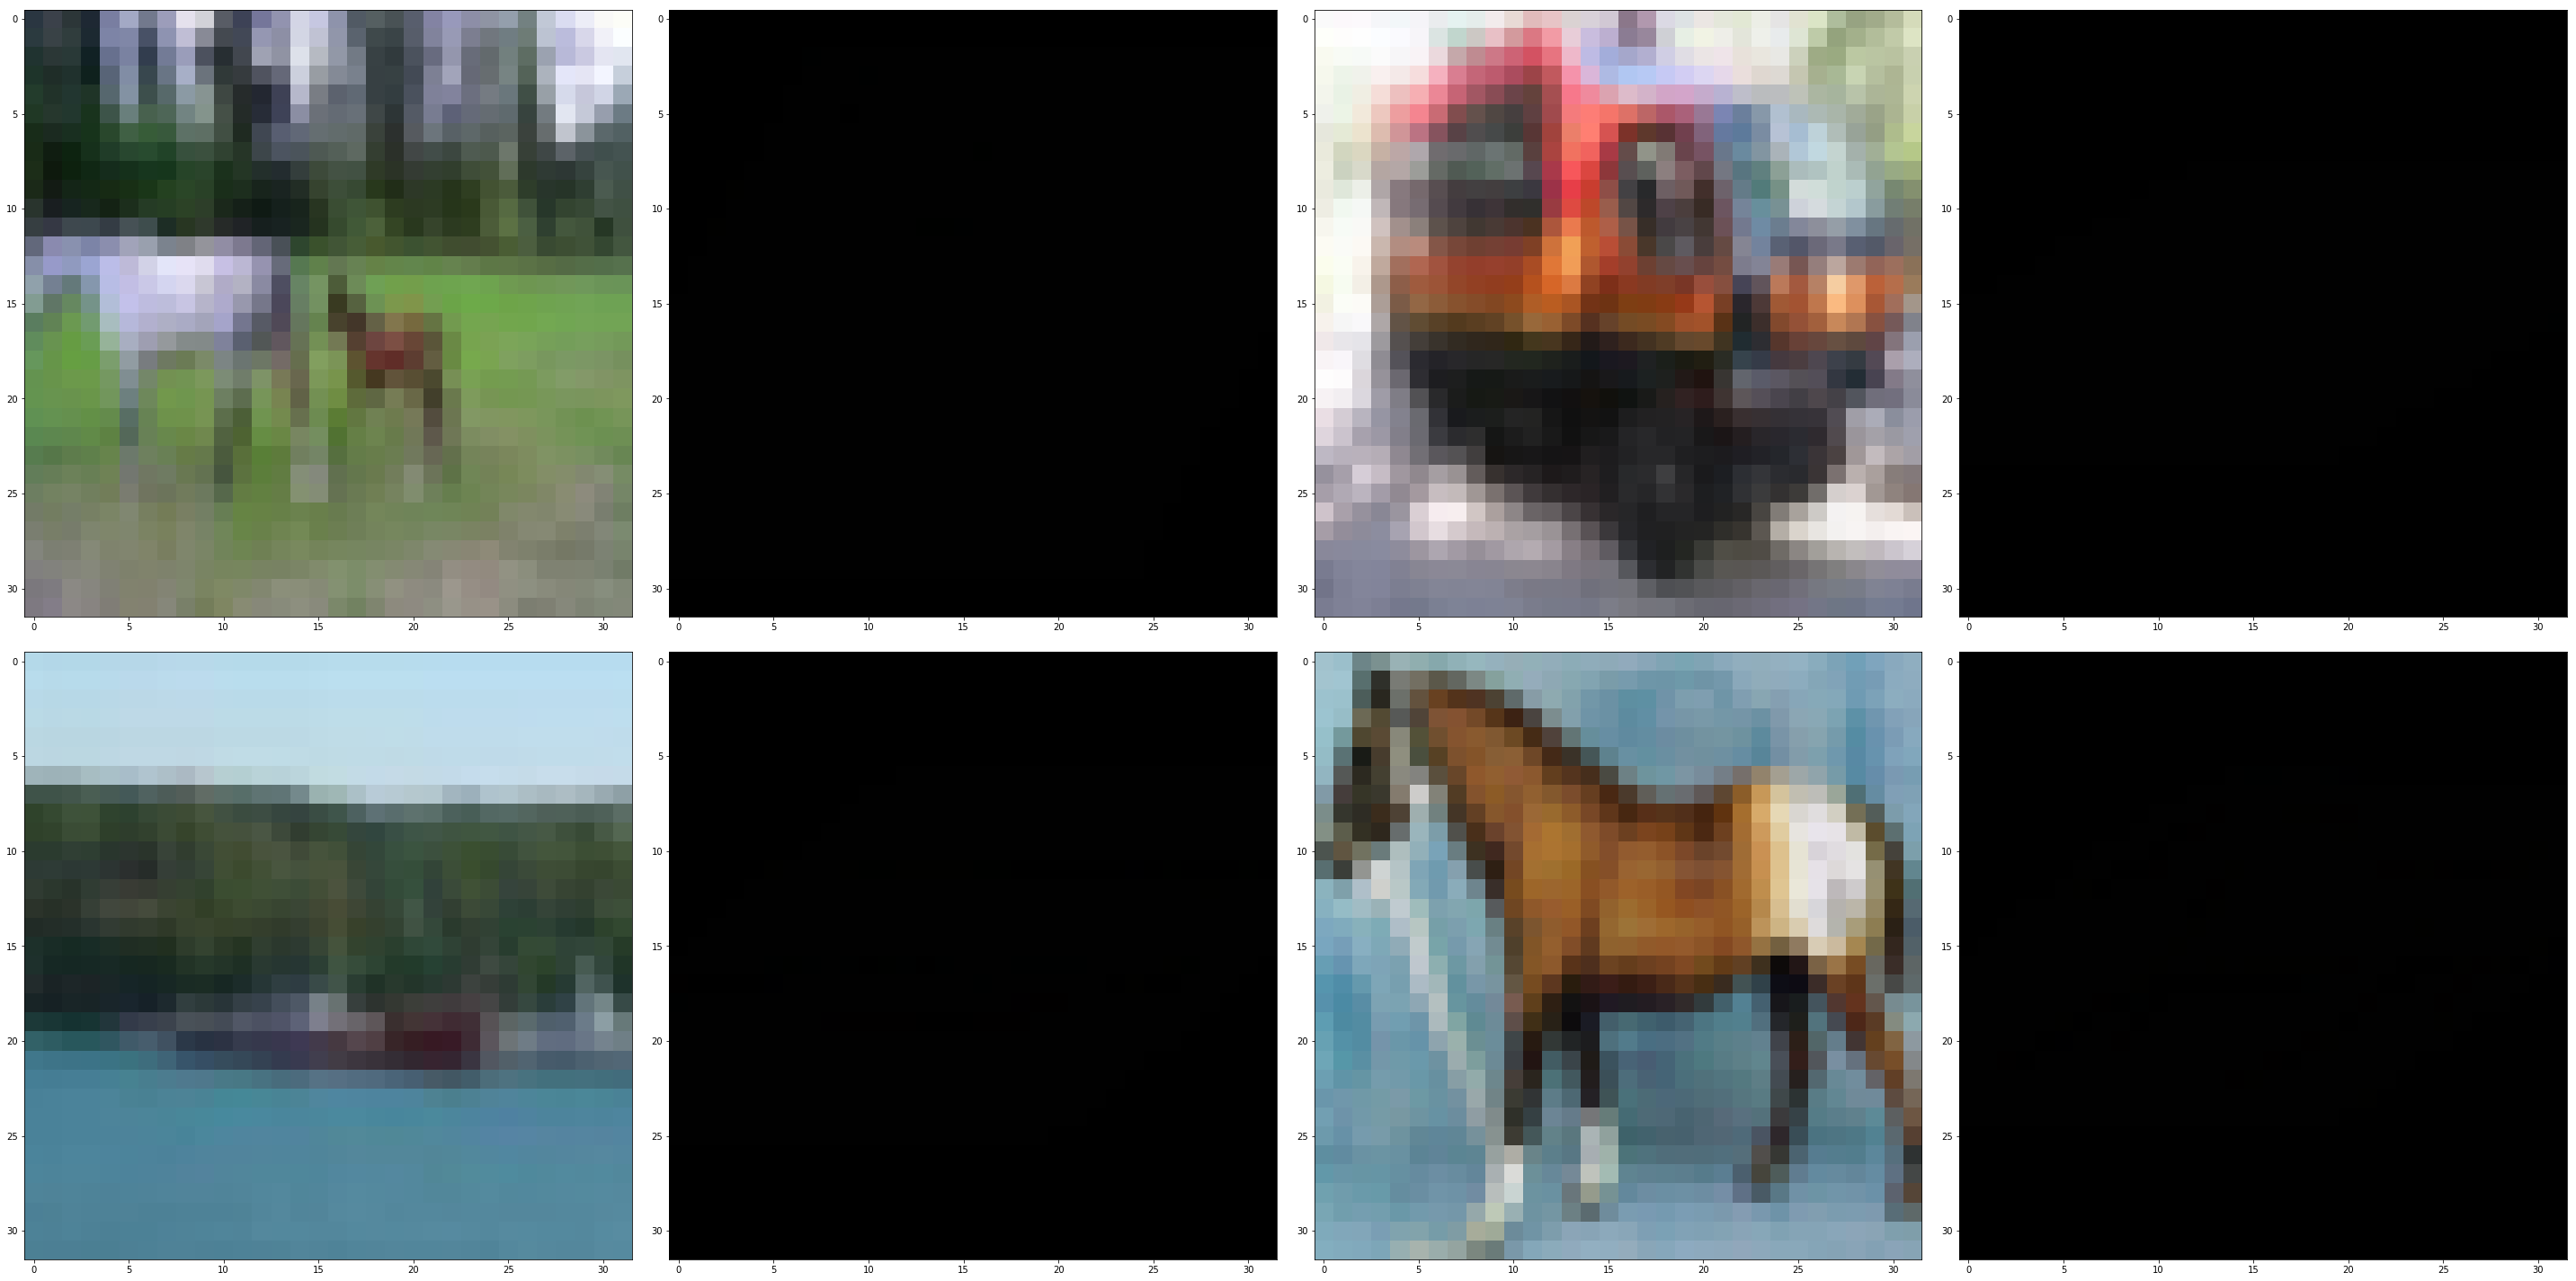

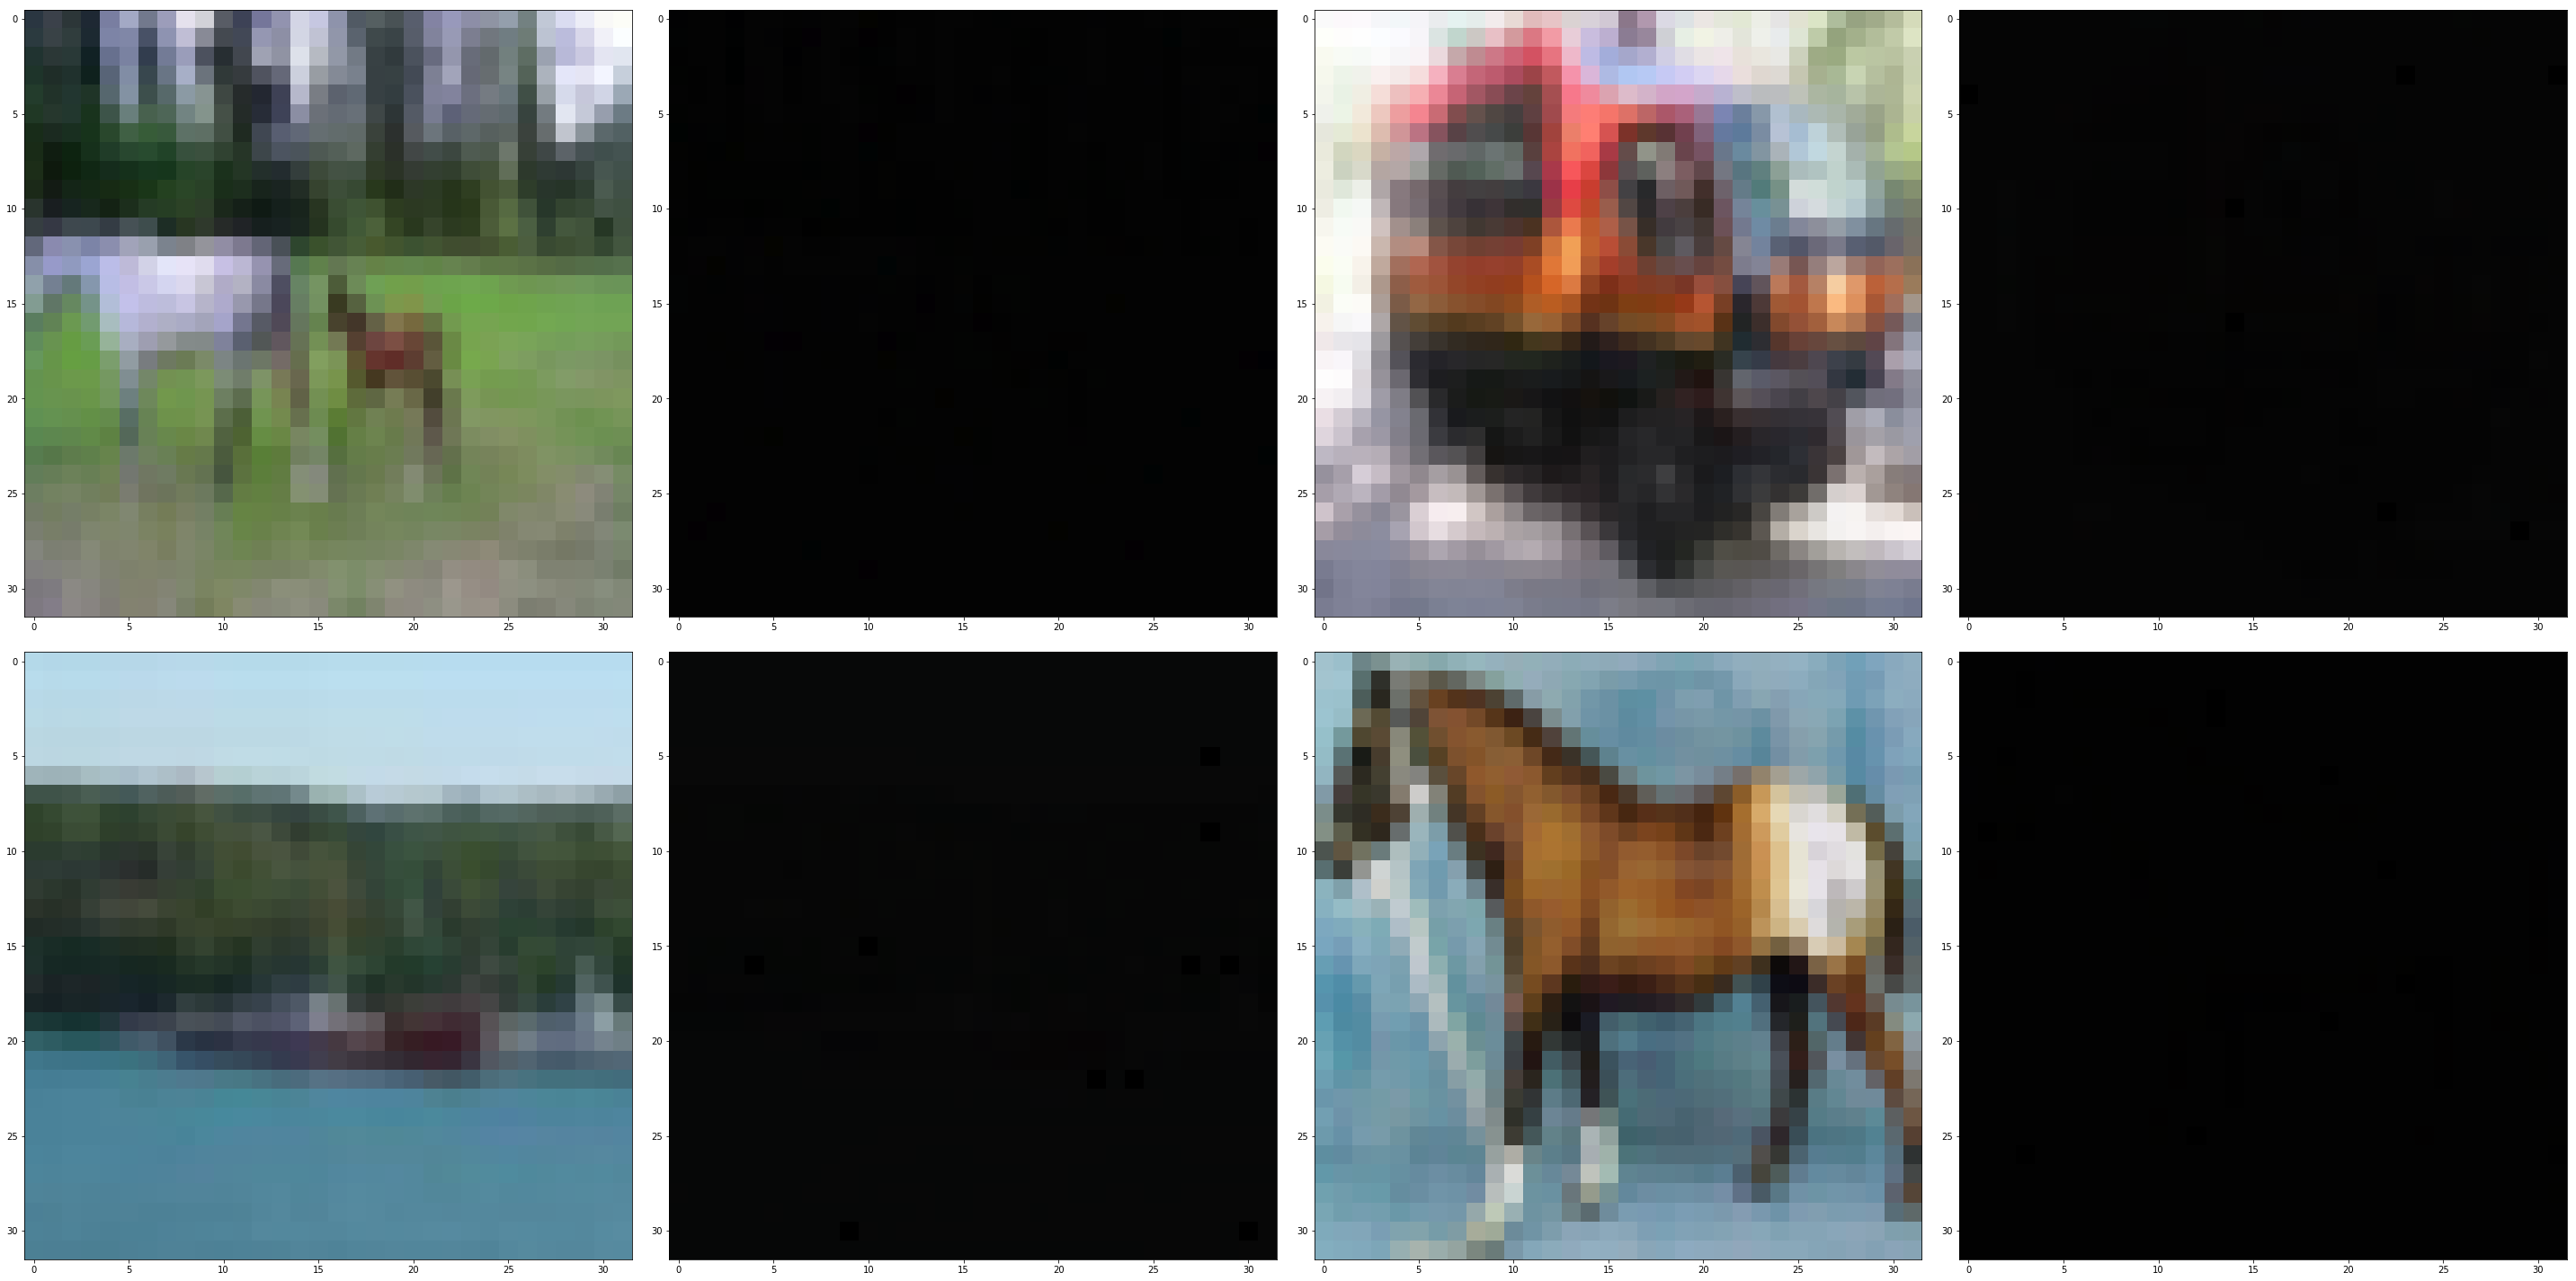

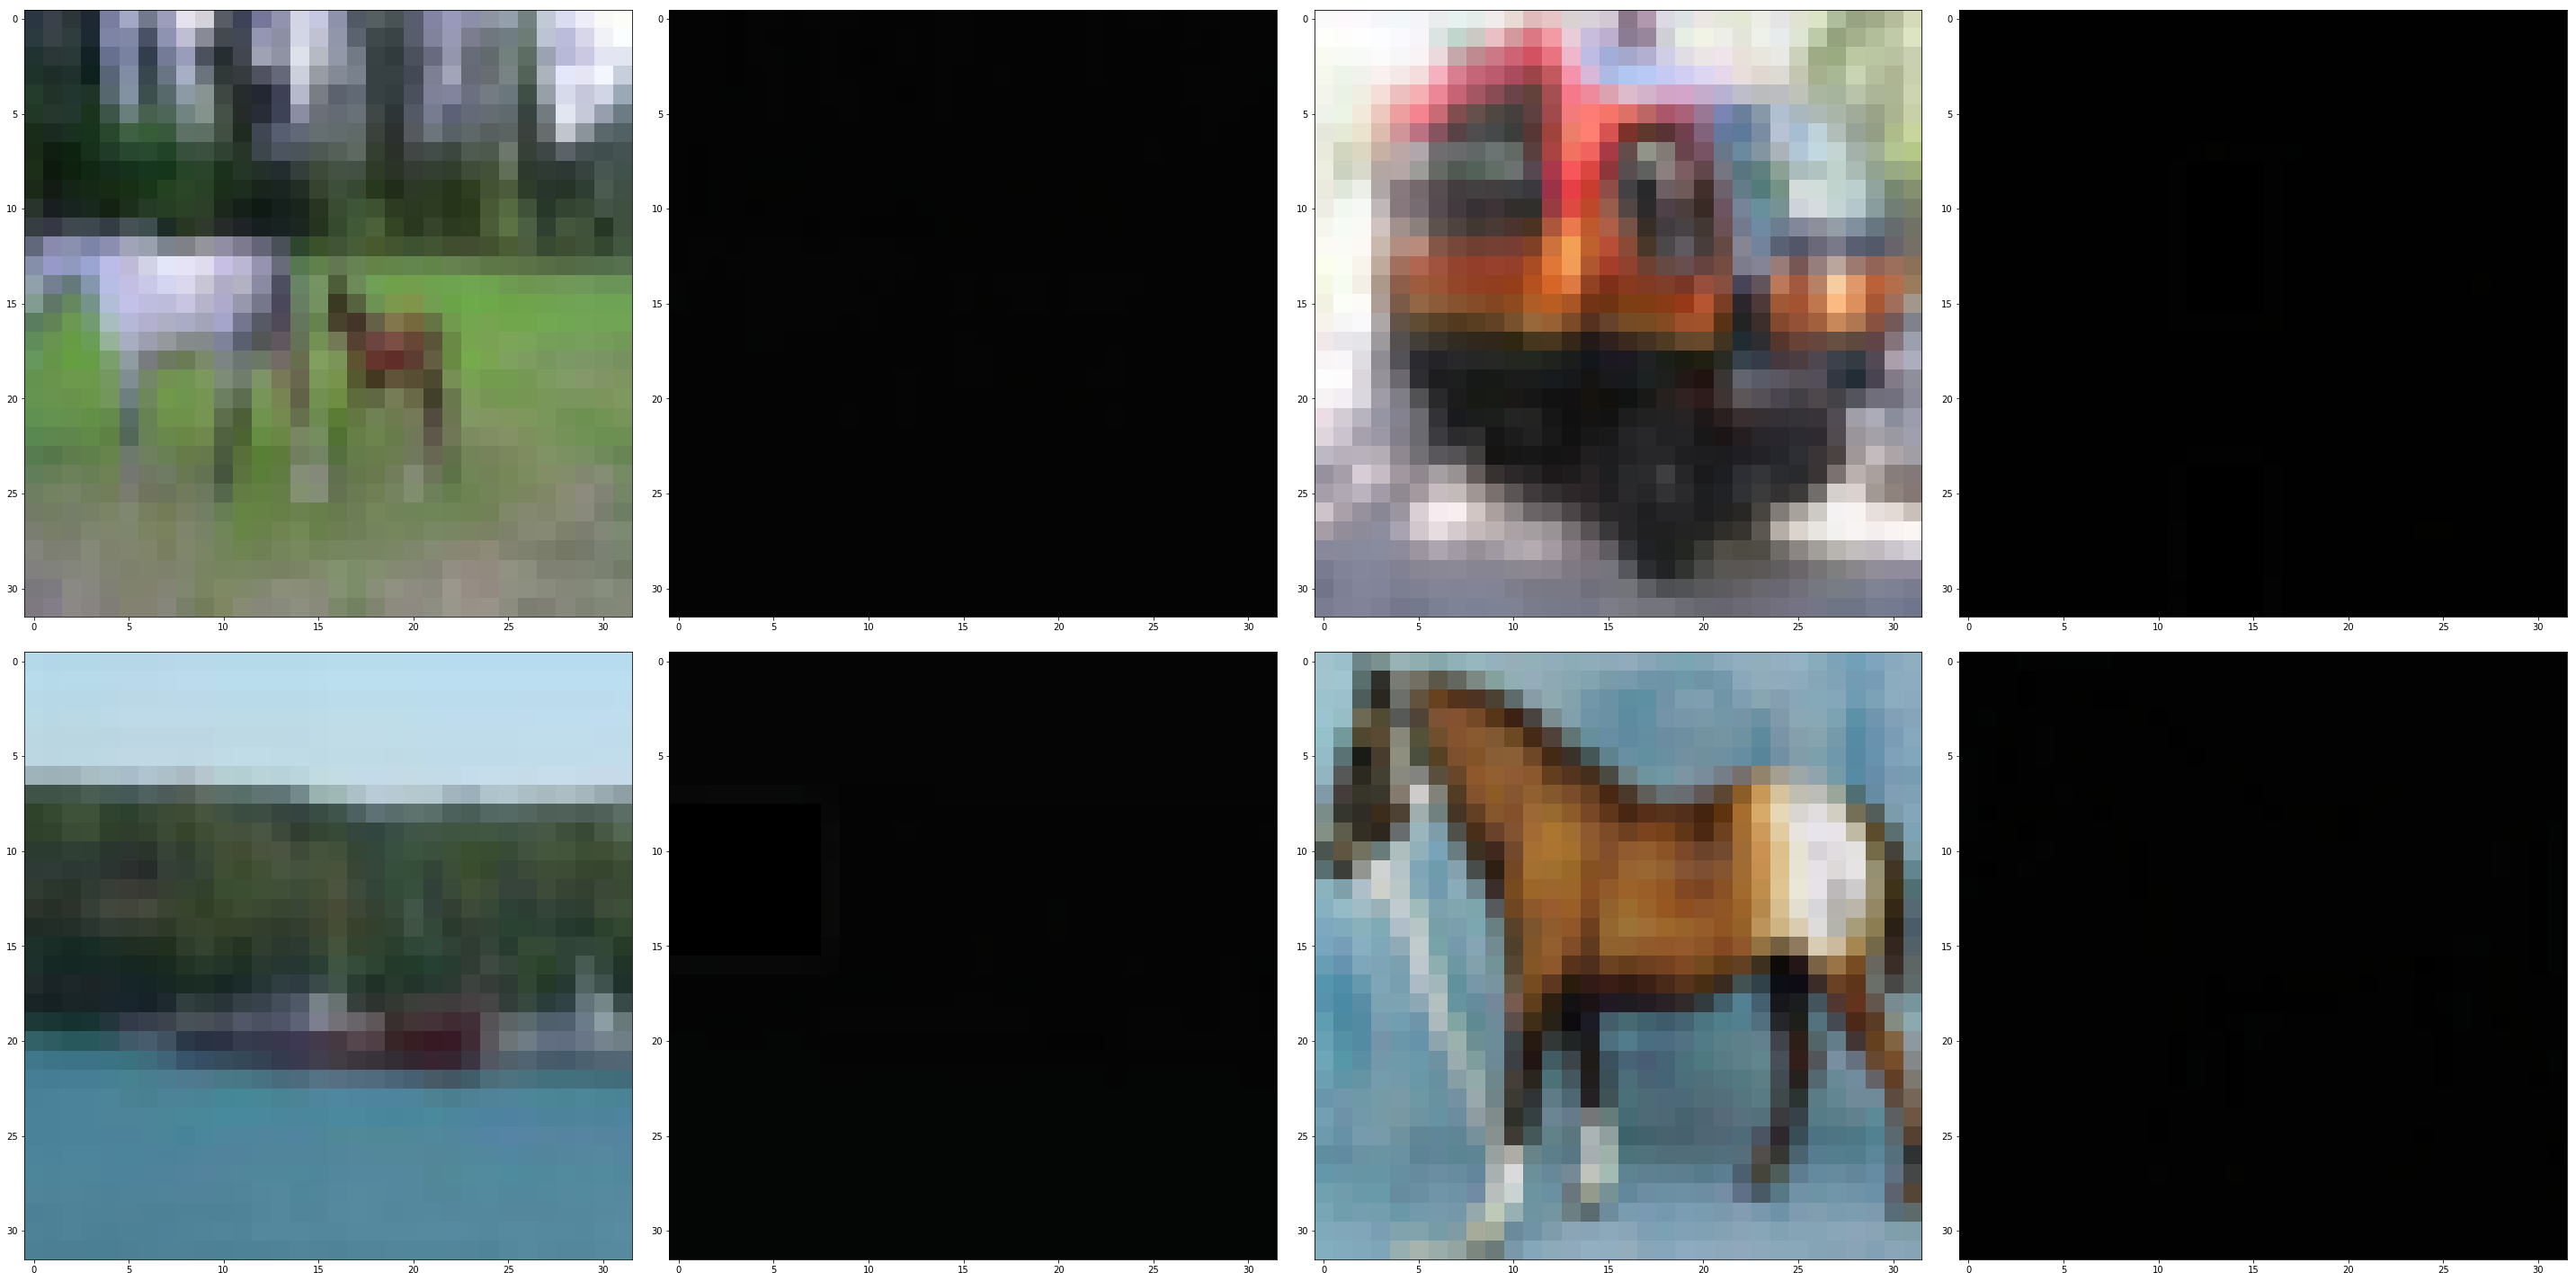

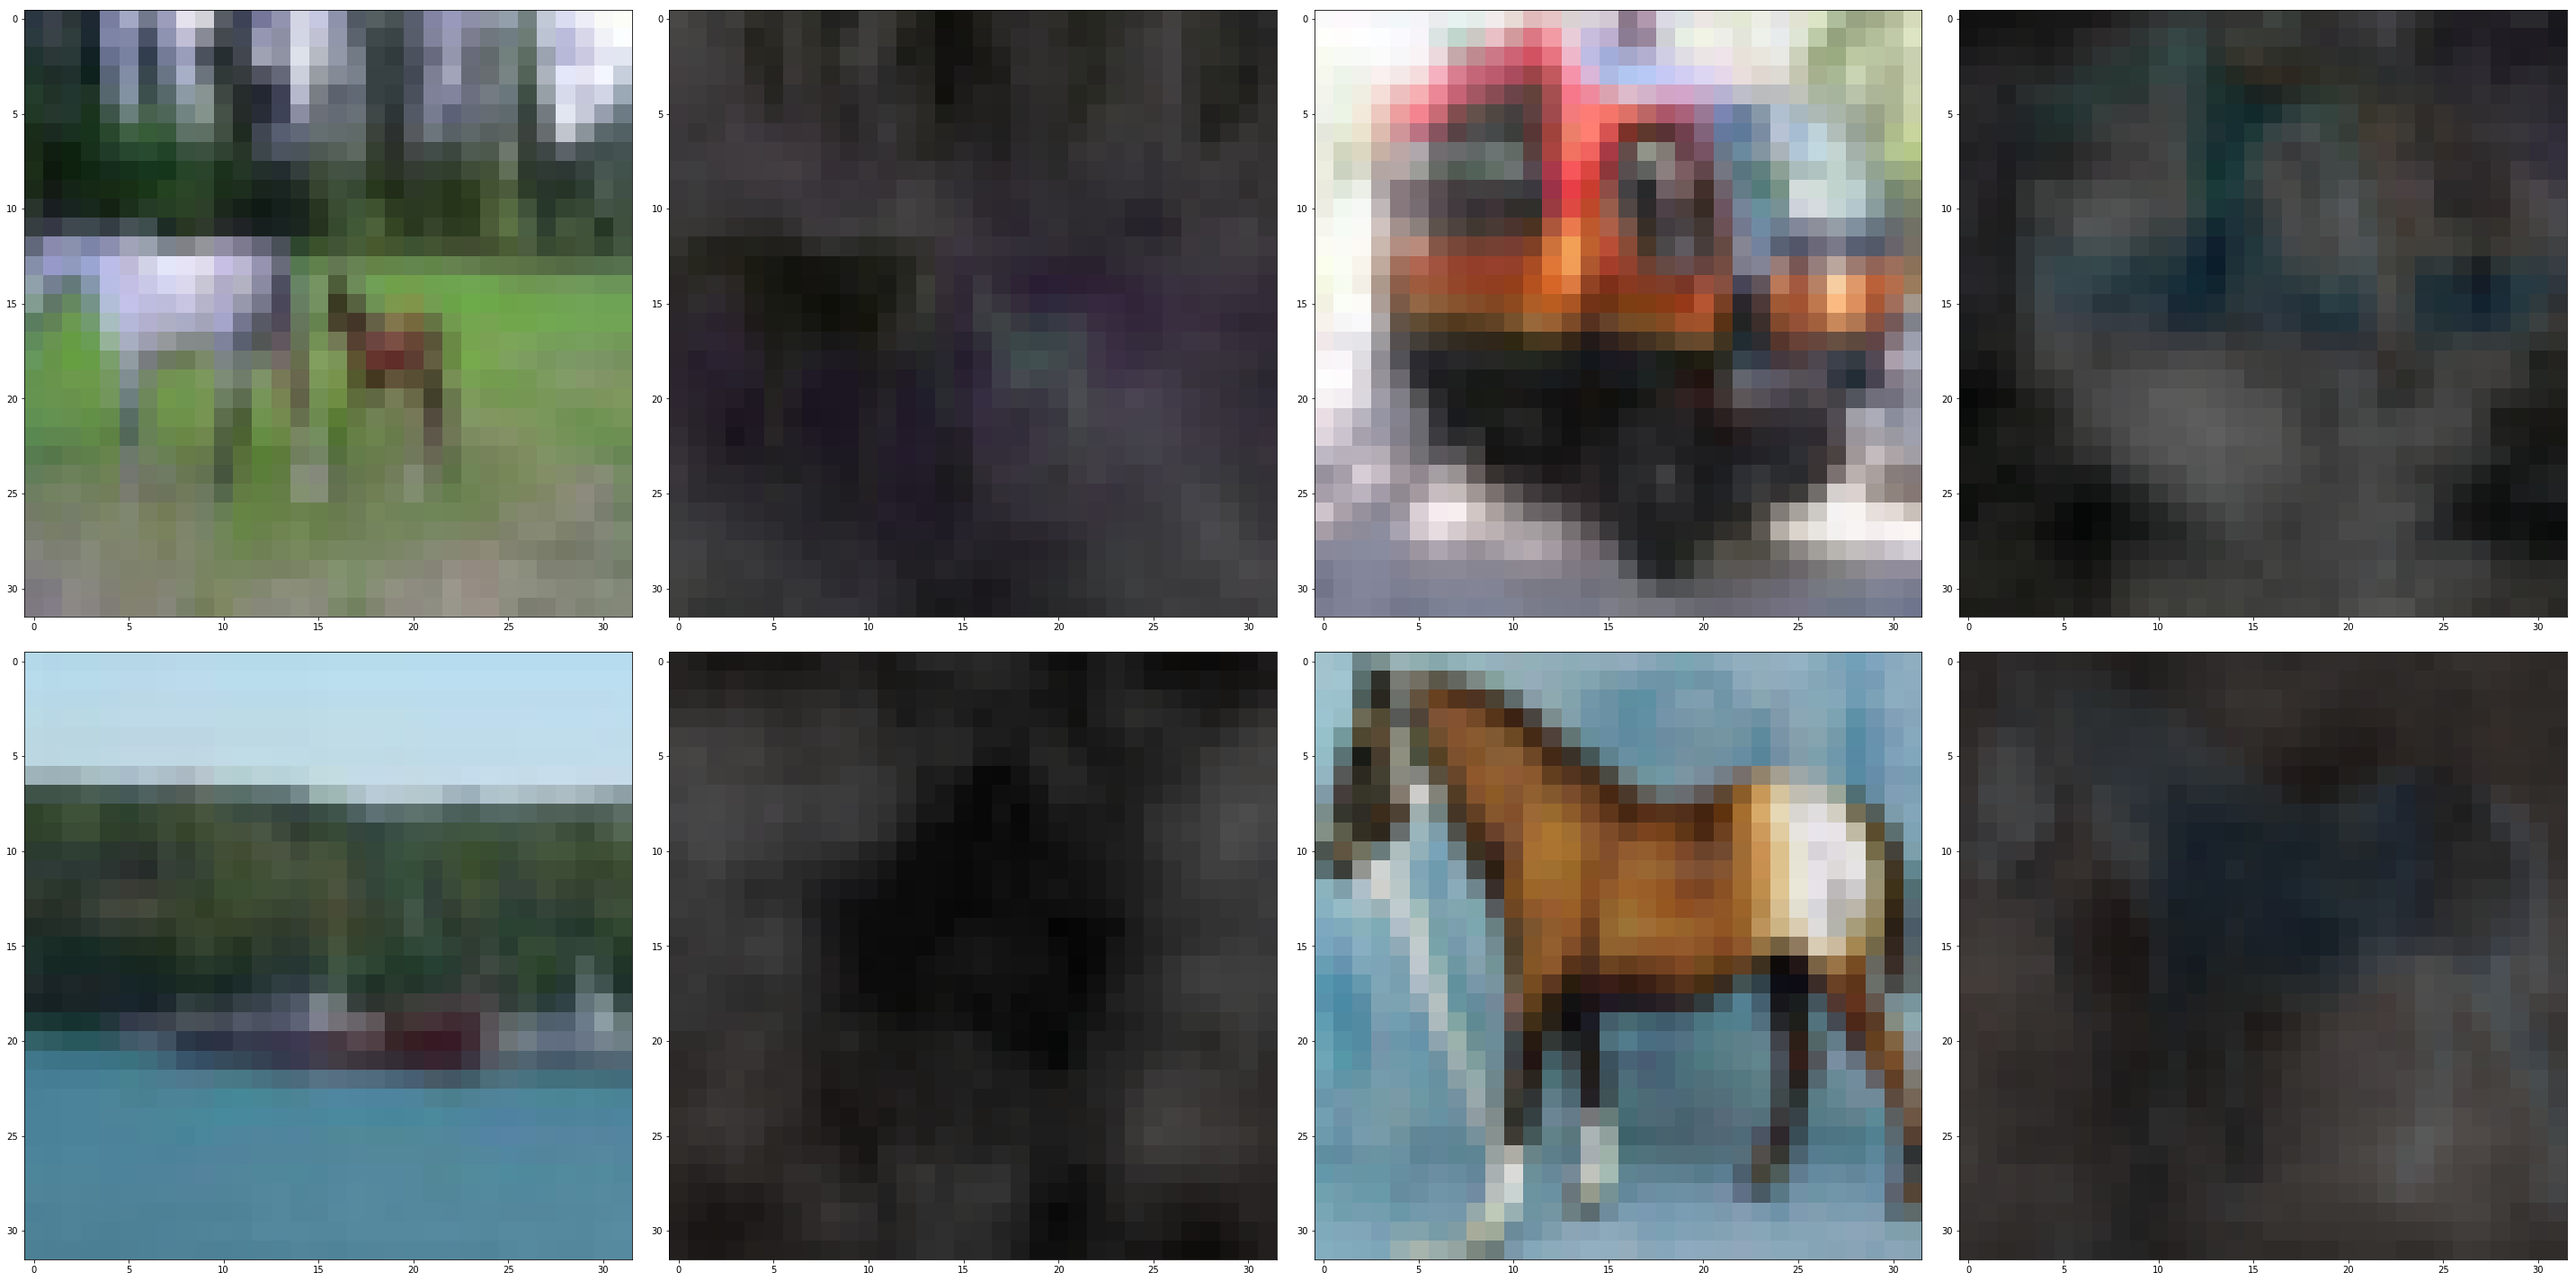

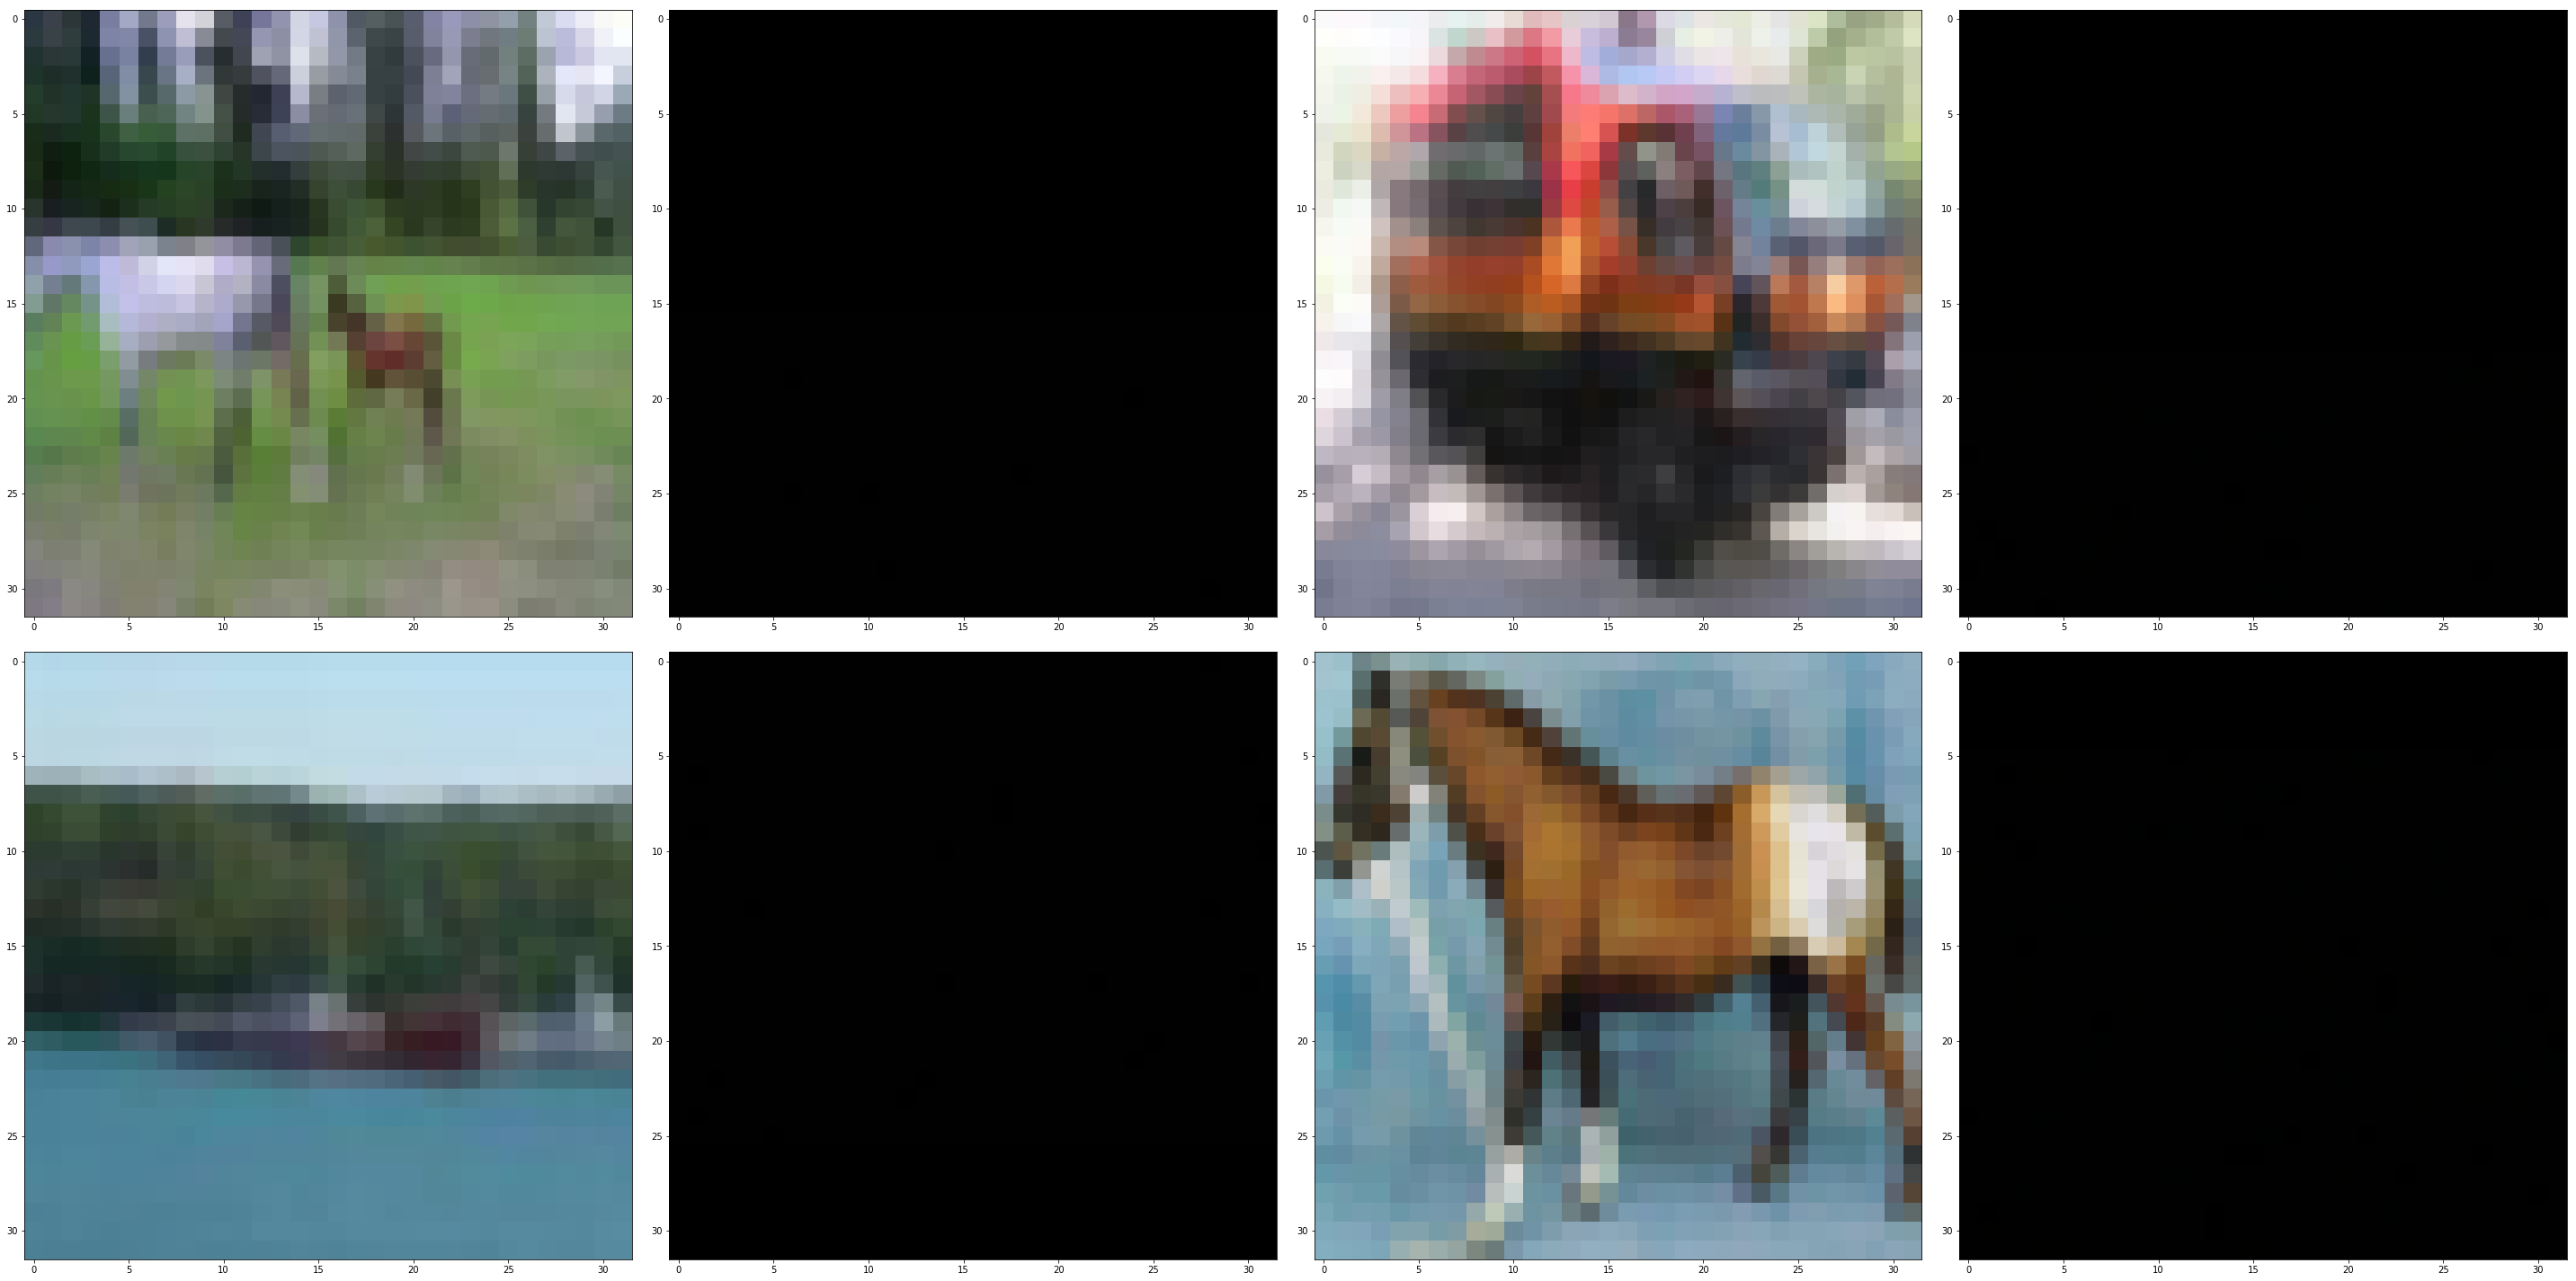

In [20]:
for i in top_policy_trial_no_arr:
    print (i)
    display_augmentation_by_trial_no(i, exp_df, data)

# Non-overfitting augmentations

In [44]:
acc_overfit_by_trial = exp_df.groupby("trial_no").sum()["acc_overfit"]

# if acc_overfit is negative, that means validation is more accurate than training, so augmentation overfits
modified_exp_df = pd.merge(
    exp_df, 
    pd.DataFrame(acc_overfit_by_trial).reset_index().rename(columns={"acc_overfit":"total_acc_overfit"}),
    on="trial_no",
    how="left"
)

non_overfitting_exp_df = modified_exp_df[modified_exp_df["total_acc_overfit"]>0]

trial_no: 3
['translate-y', 0.648, 'translate-y', 0.9570000000000001, 'rotate', 0.87, 1.0]
trial_no: 32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

['emboss', 0.019, 'emboss', 0.991, 'clouds', 0.057999999999999996, 1.0]
trial_no: 147


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['brighten', 0.107, 'translate-x', 0.025, 'fog', 0.035, 1.0]
trial_no: 108


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

['emboss', 0.267, 'coarse-dropout', 1.0, 'emboss', 0.725, 1.0]
trial_no: 86


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

['sharpen', 0.105, 'coarse-dropout', 0.604, 'translate-y', 0.836, 1.0]


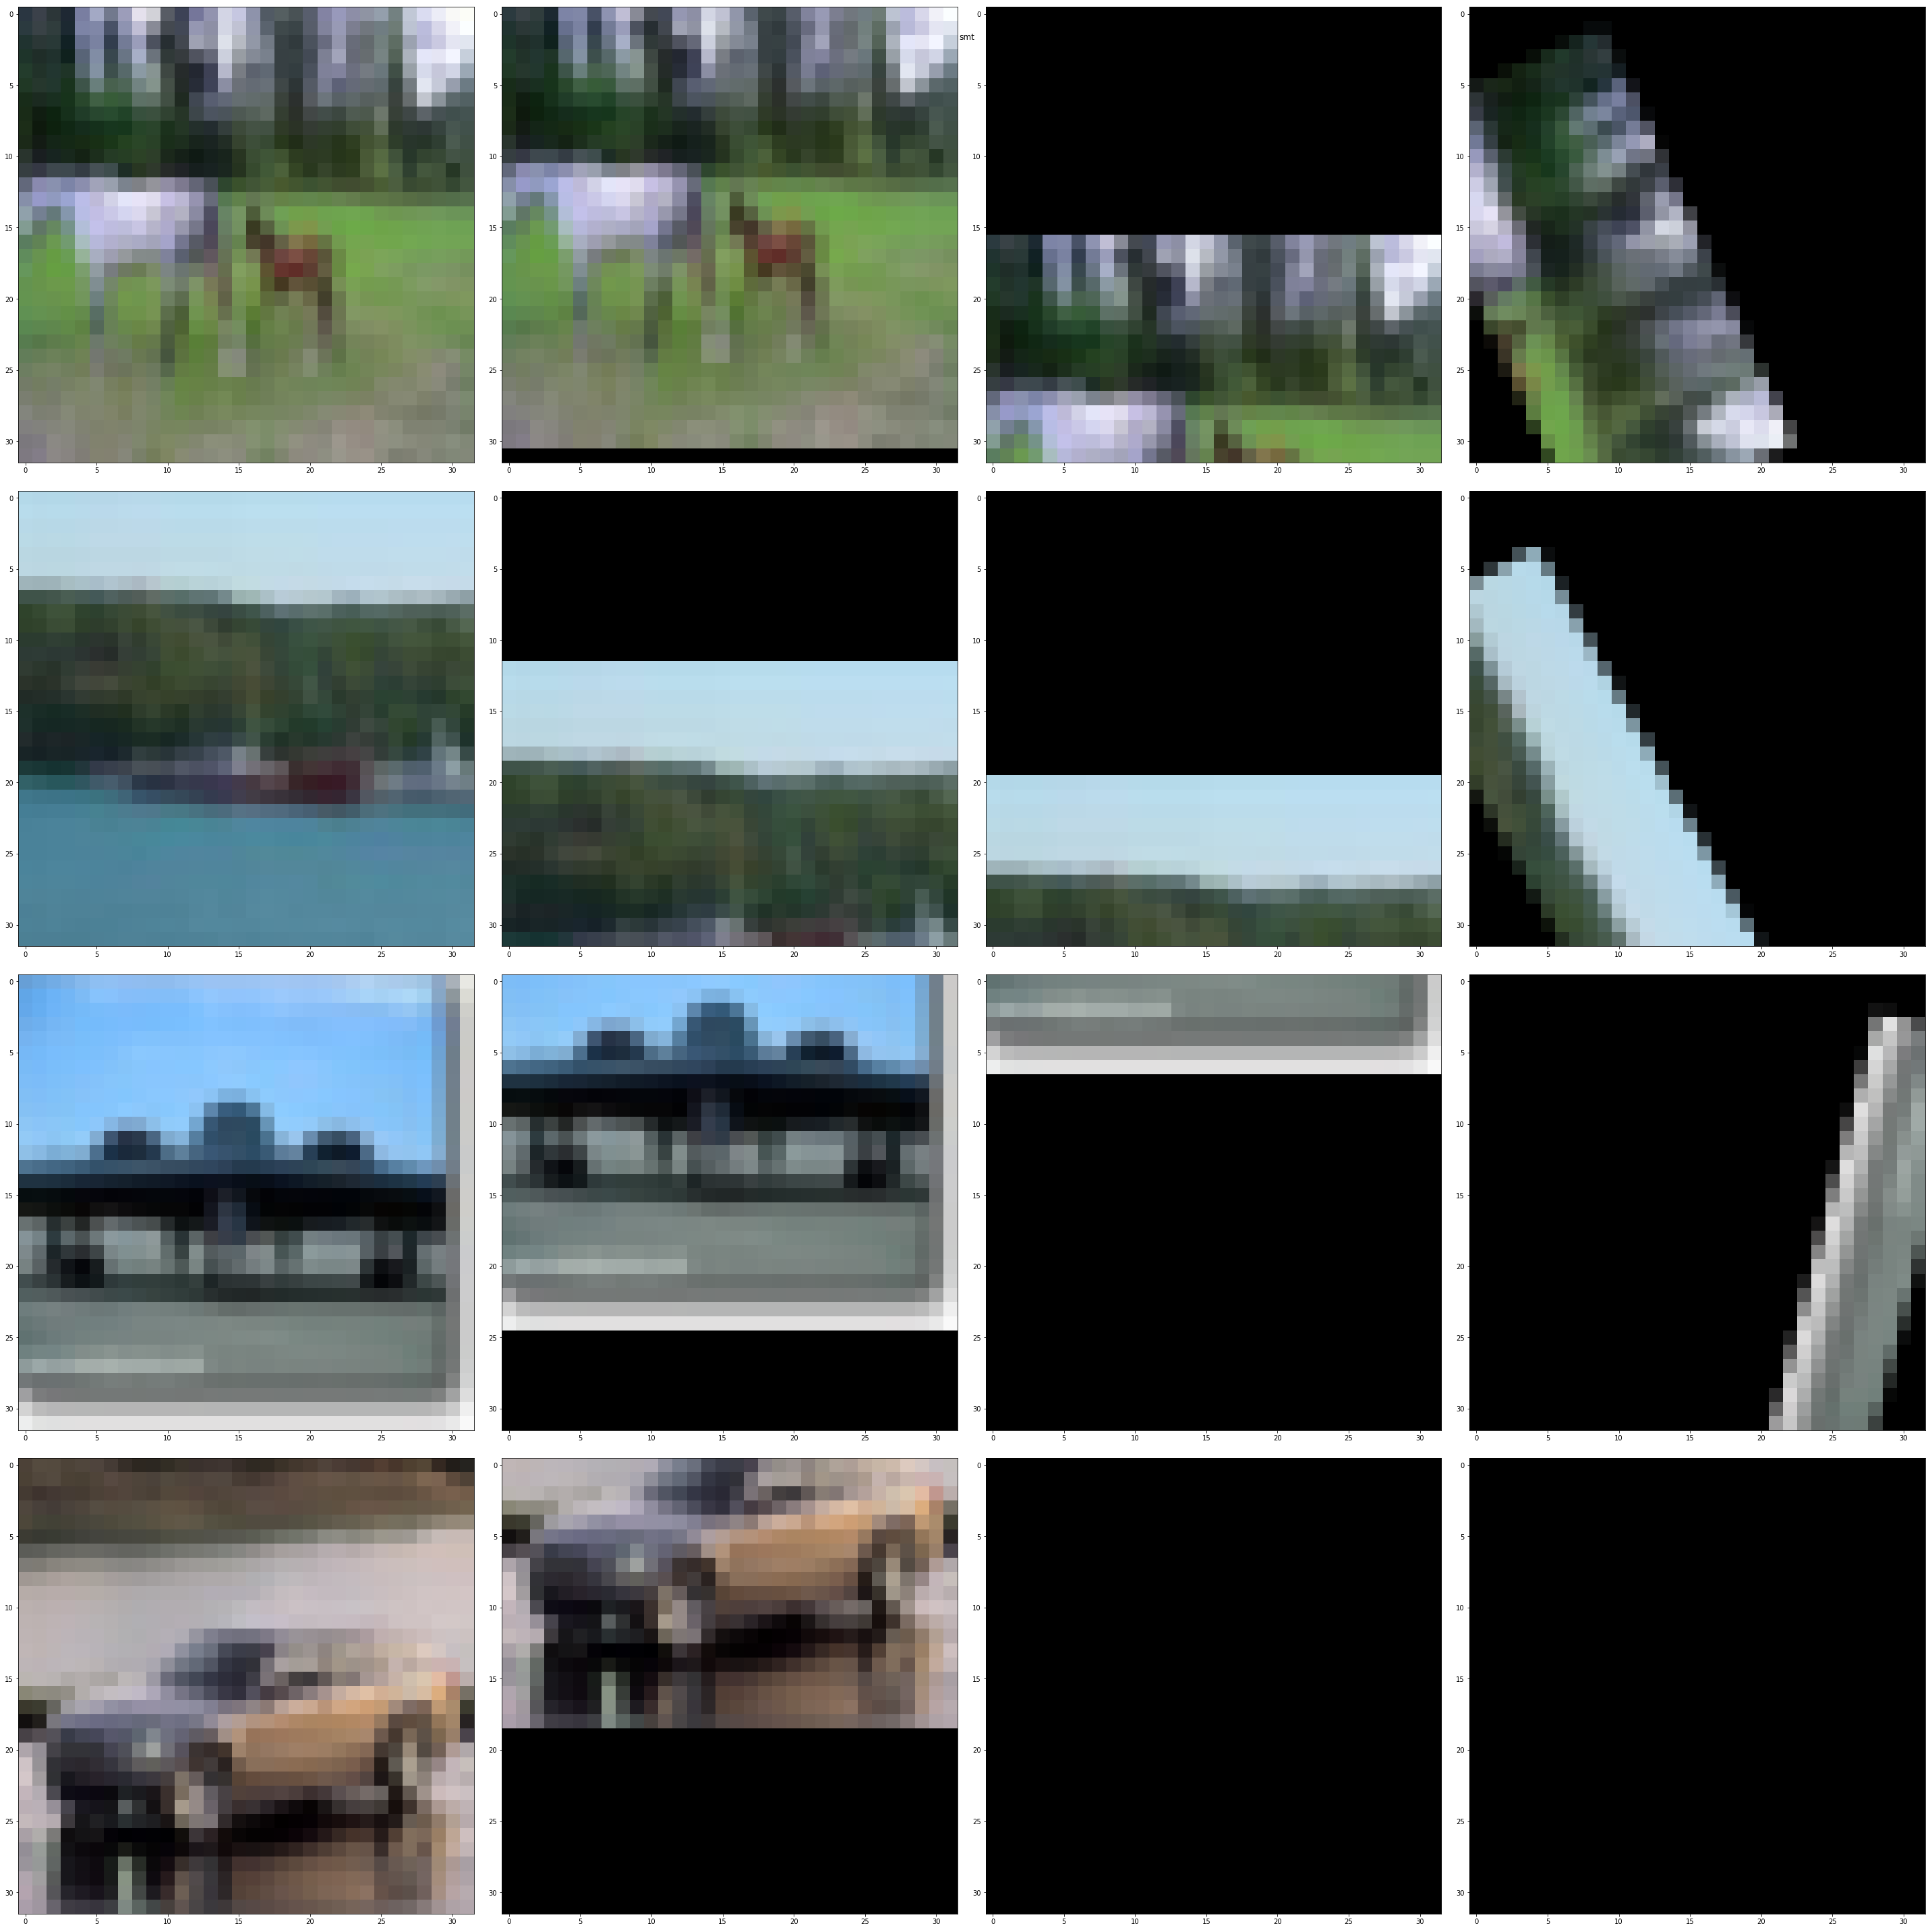

<Figure size 144x144 with 0 Axes>

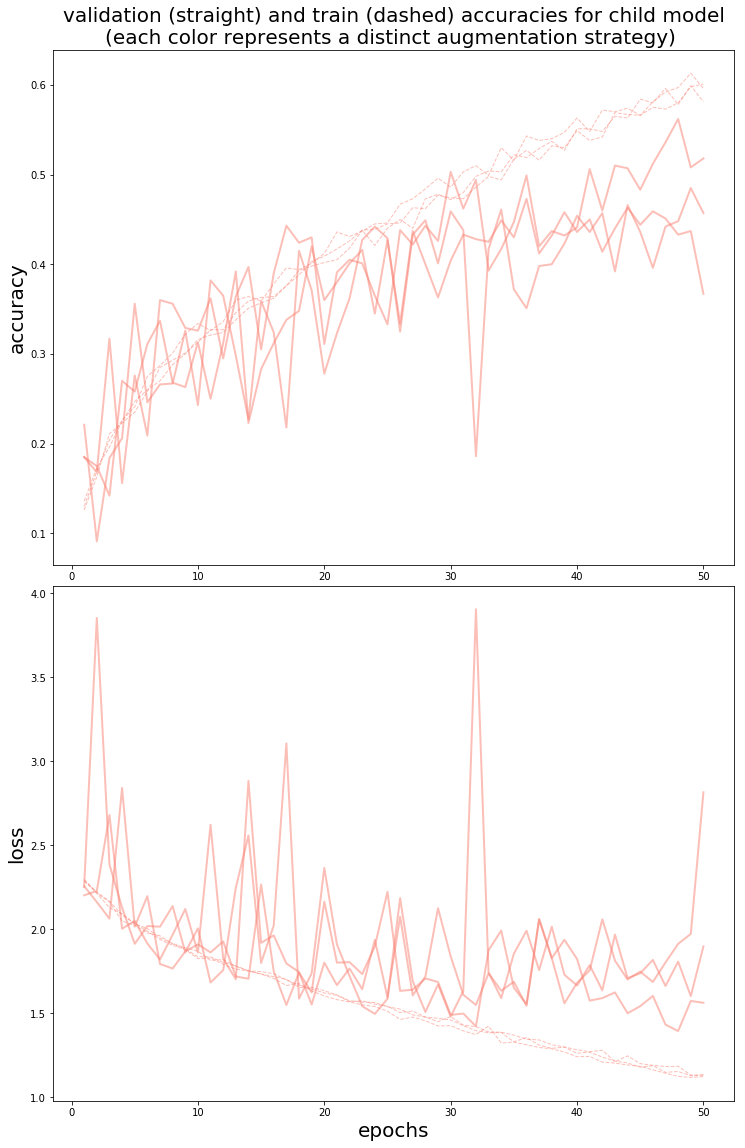

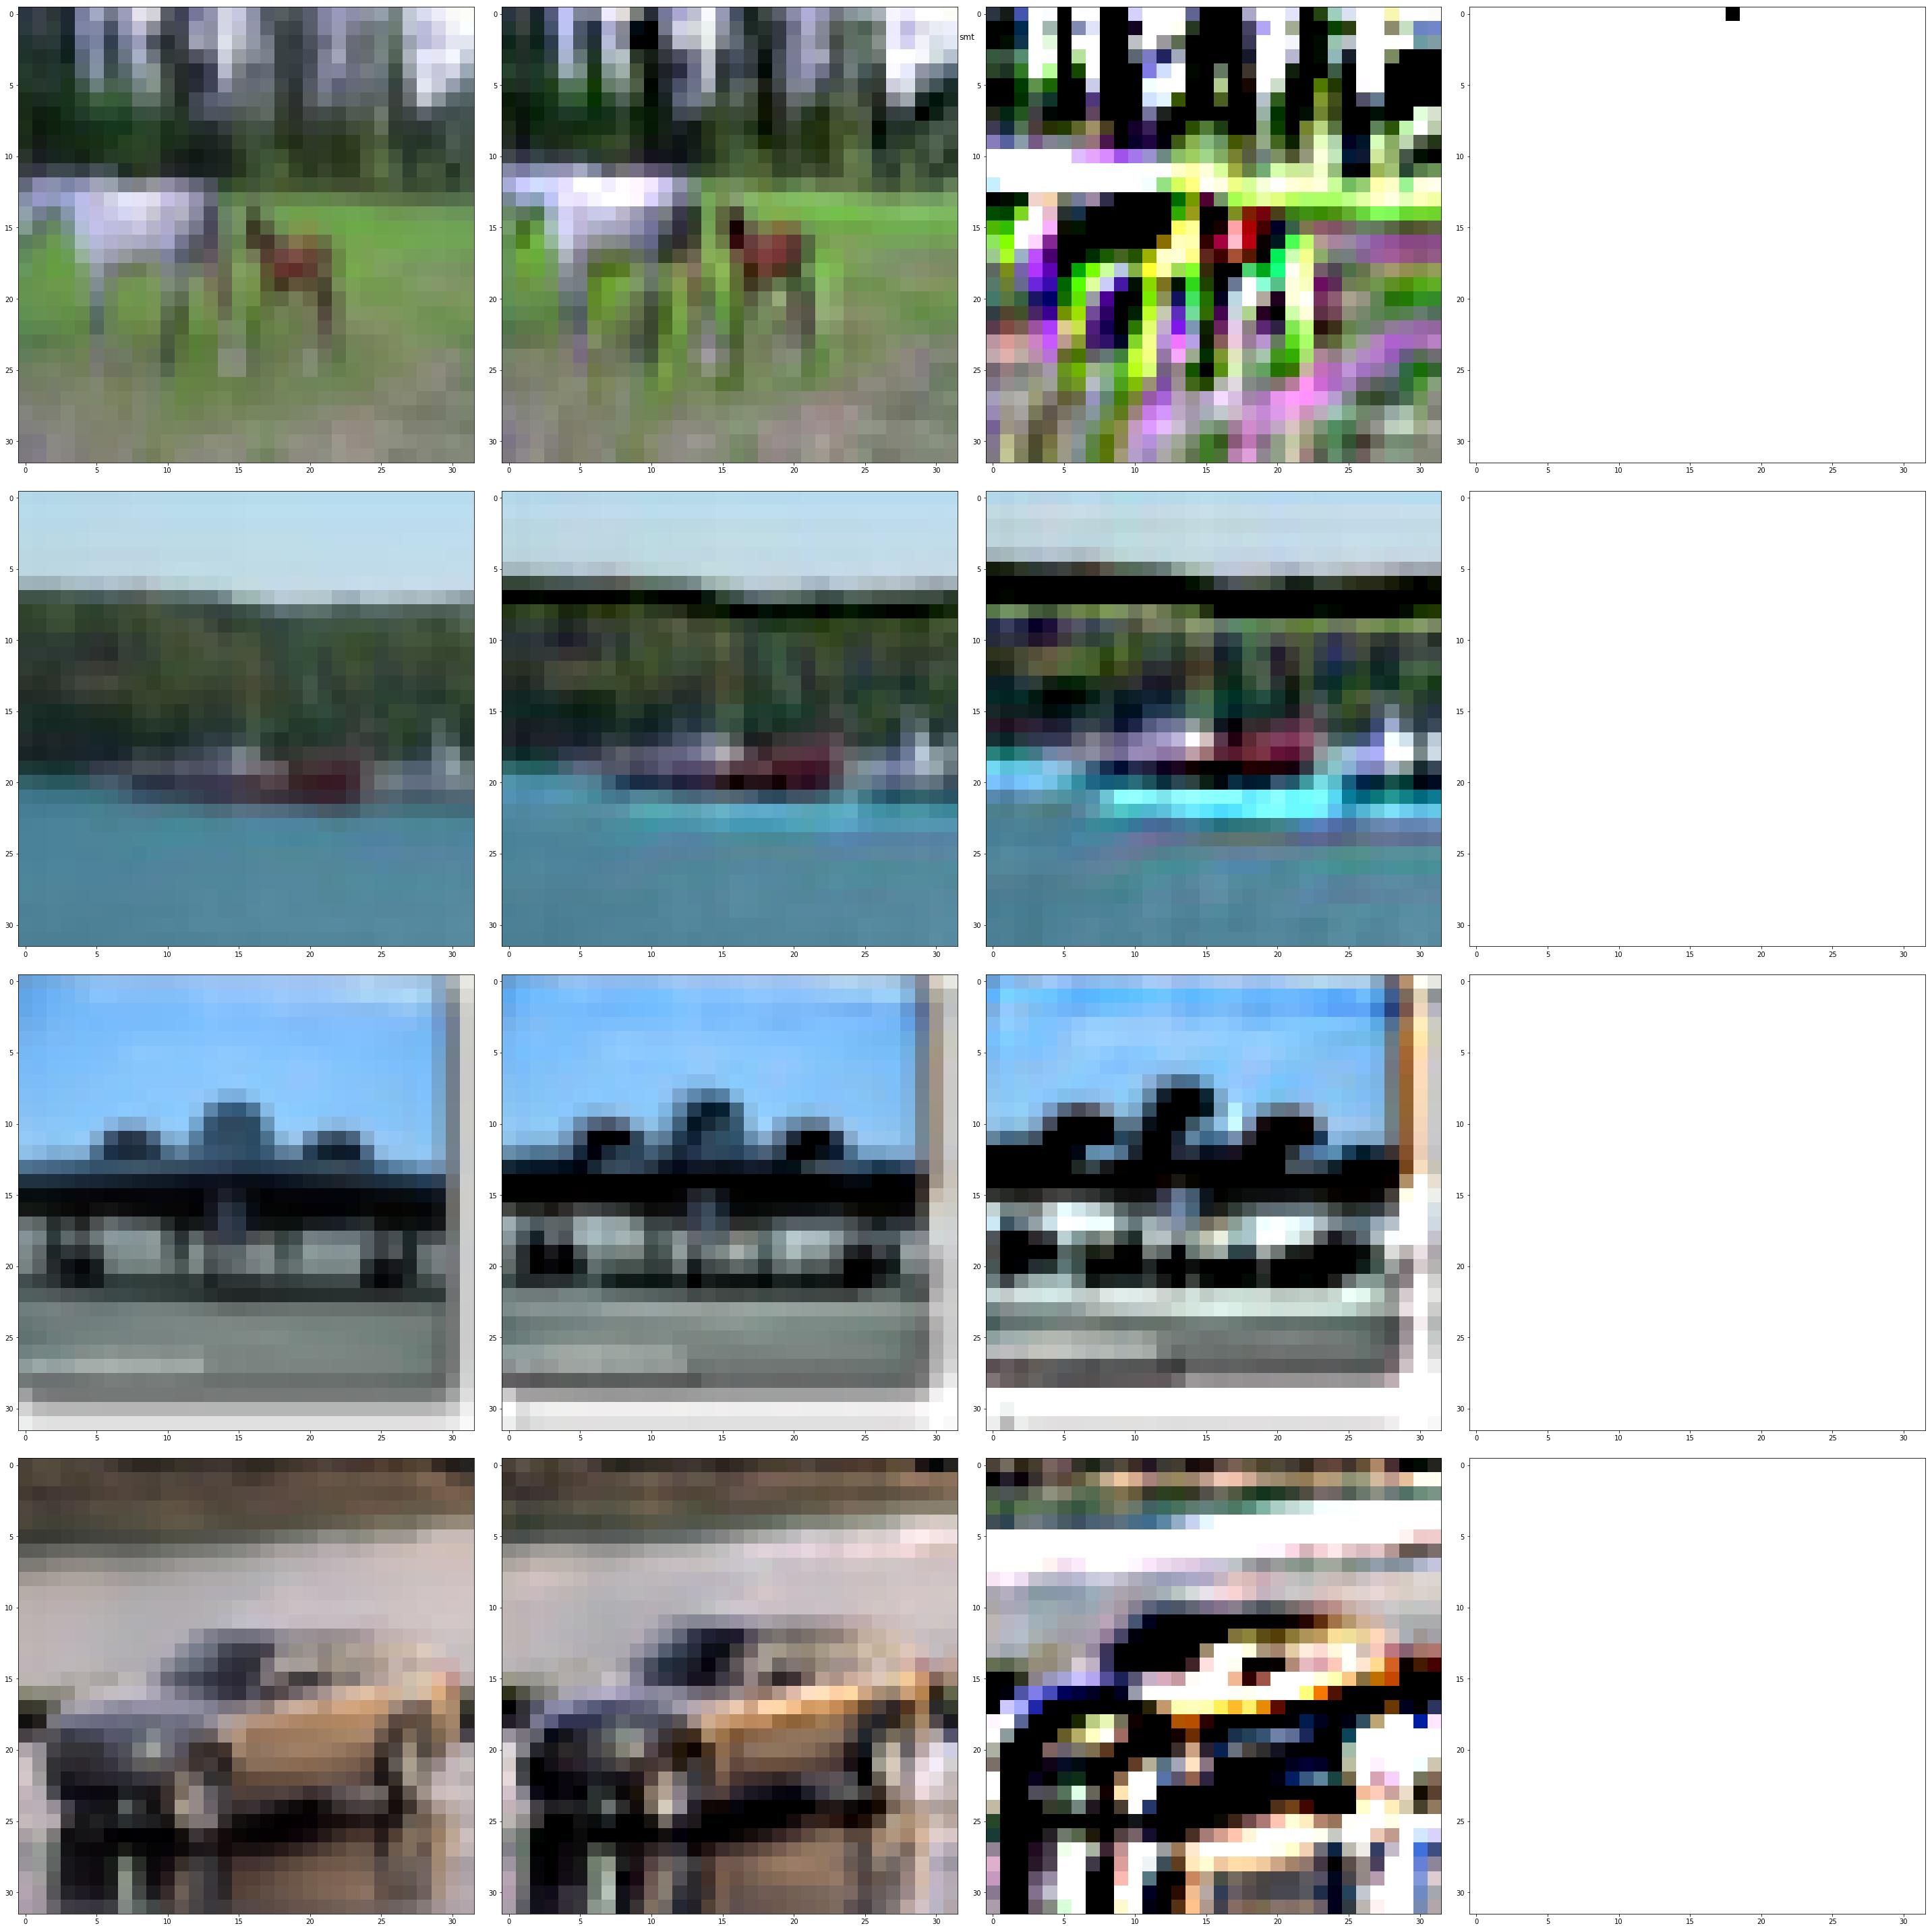

<Figure size 144x144 with 0 Axes>

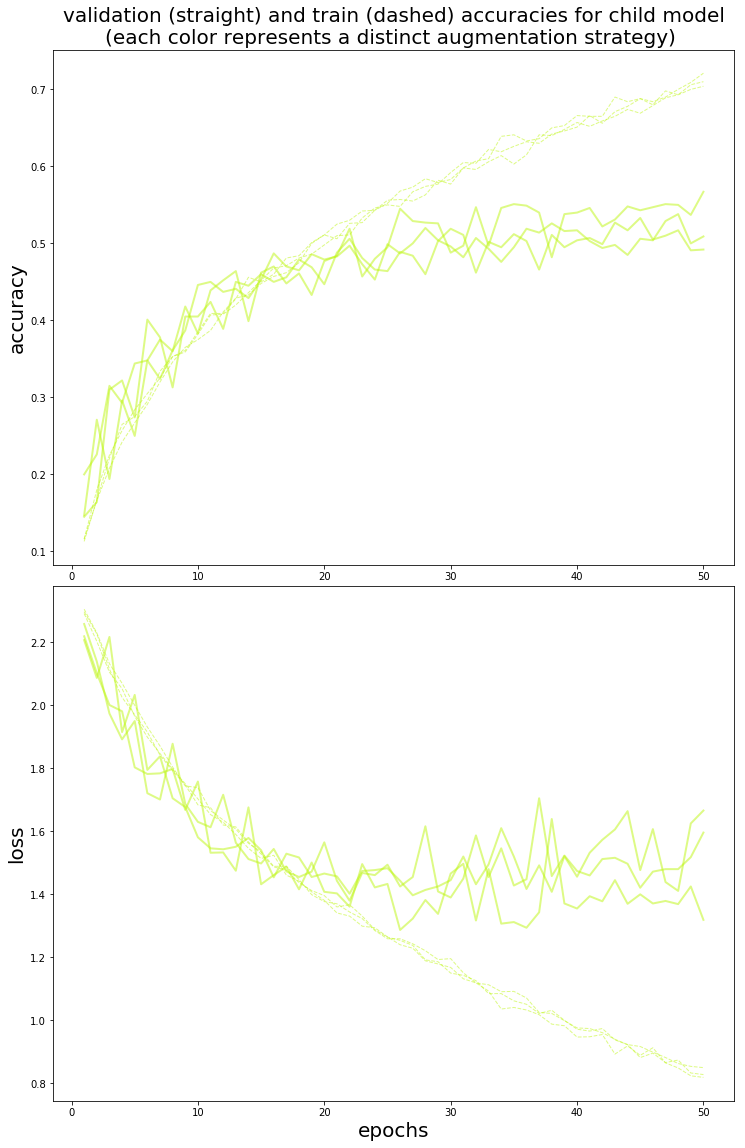

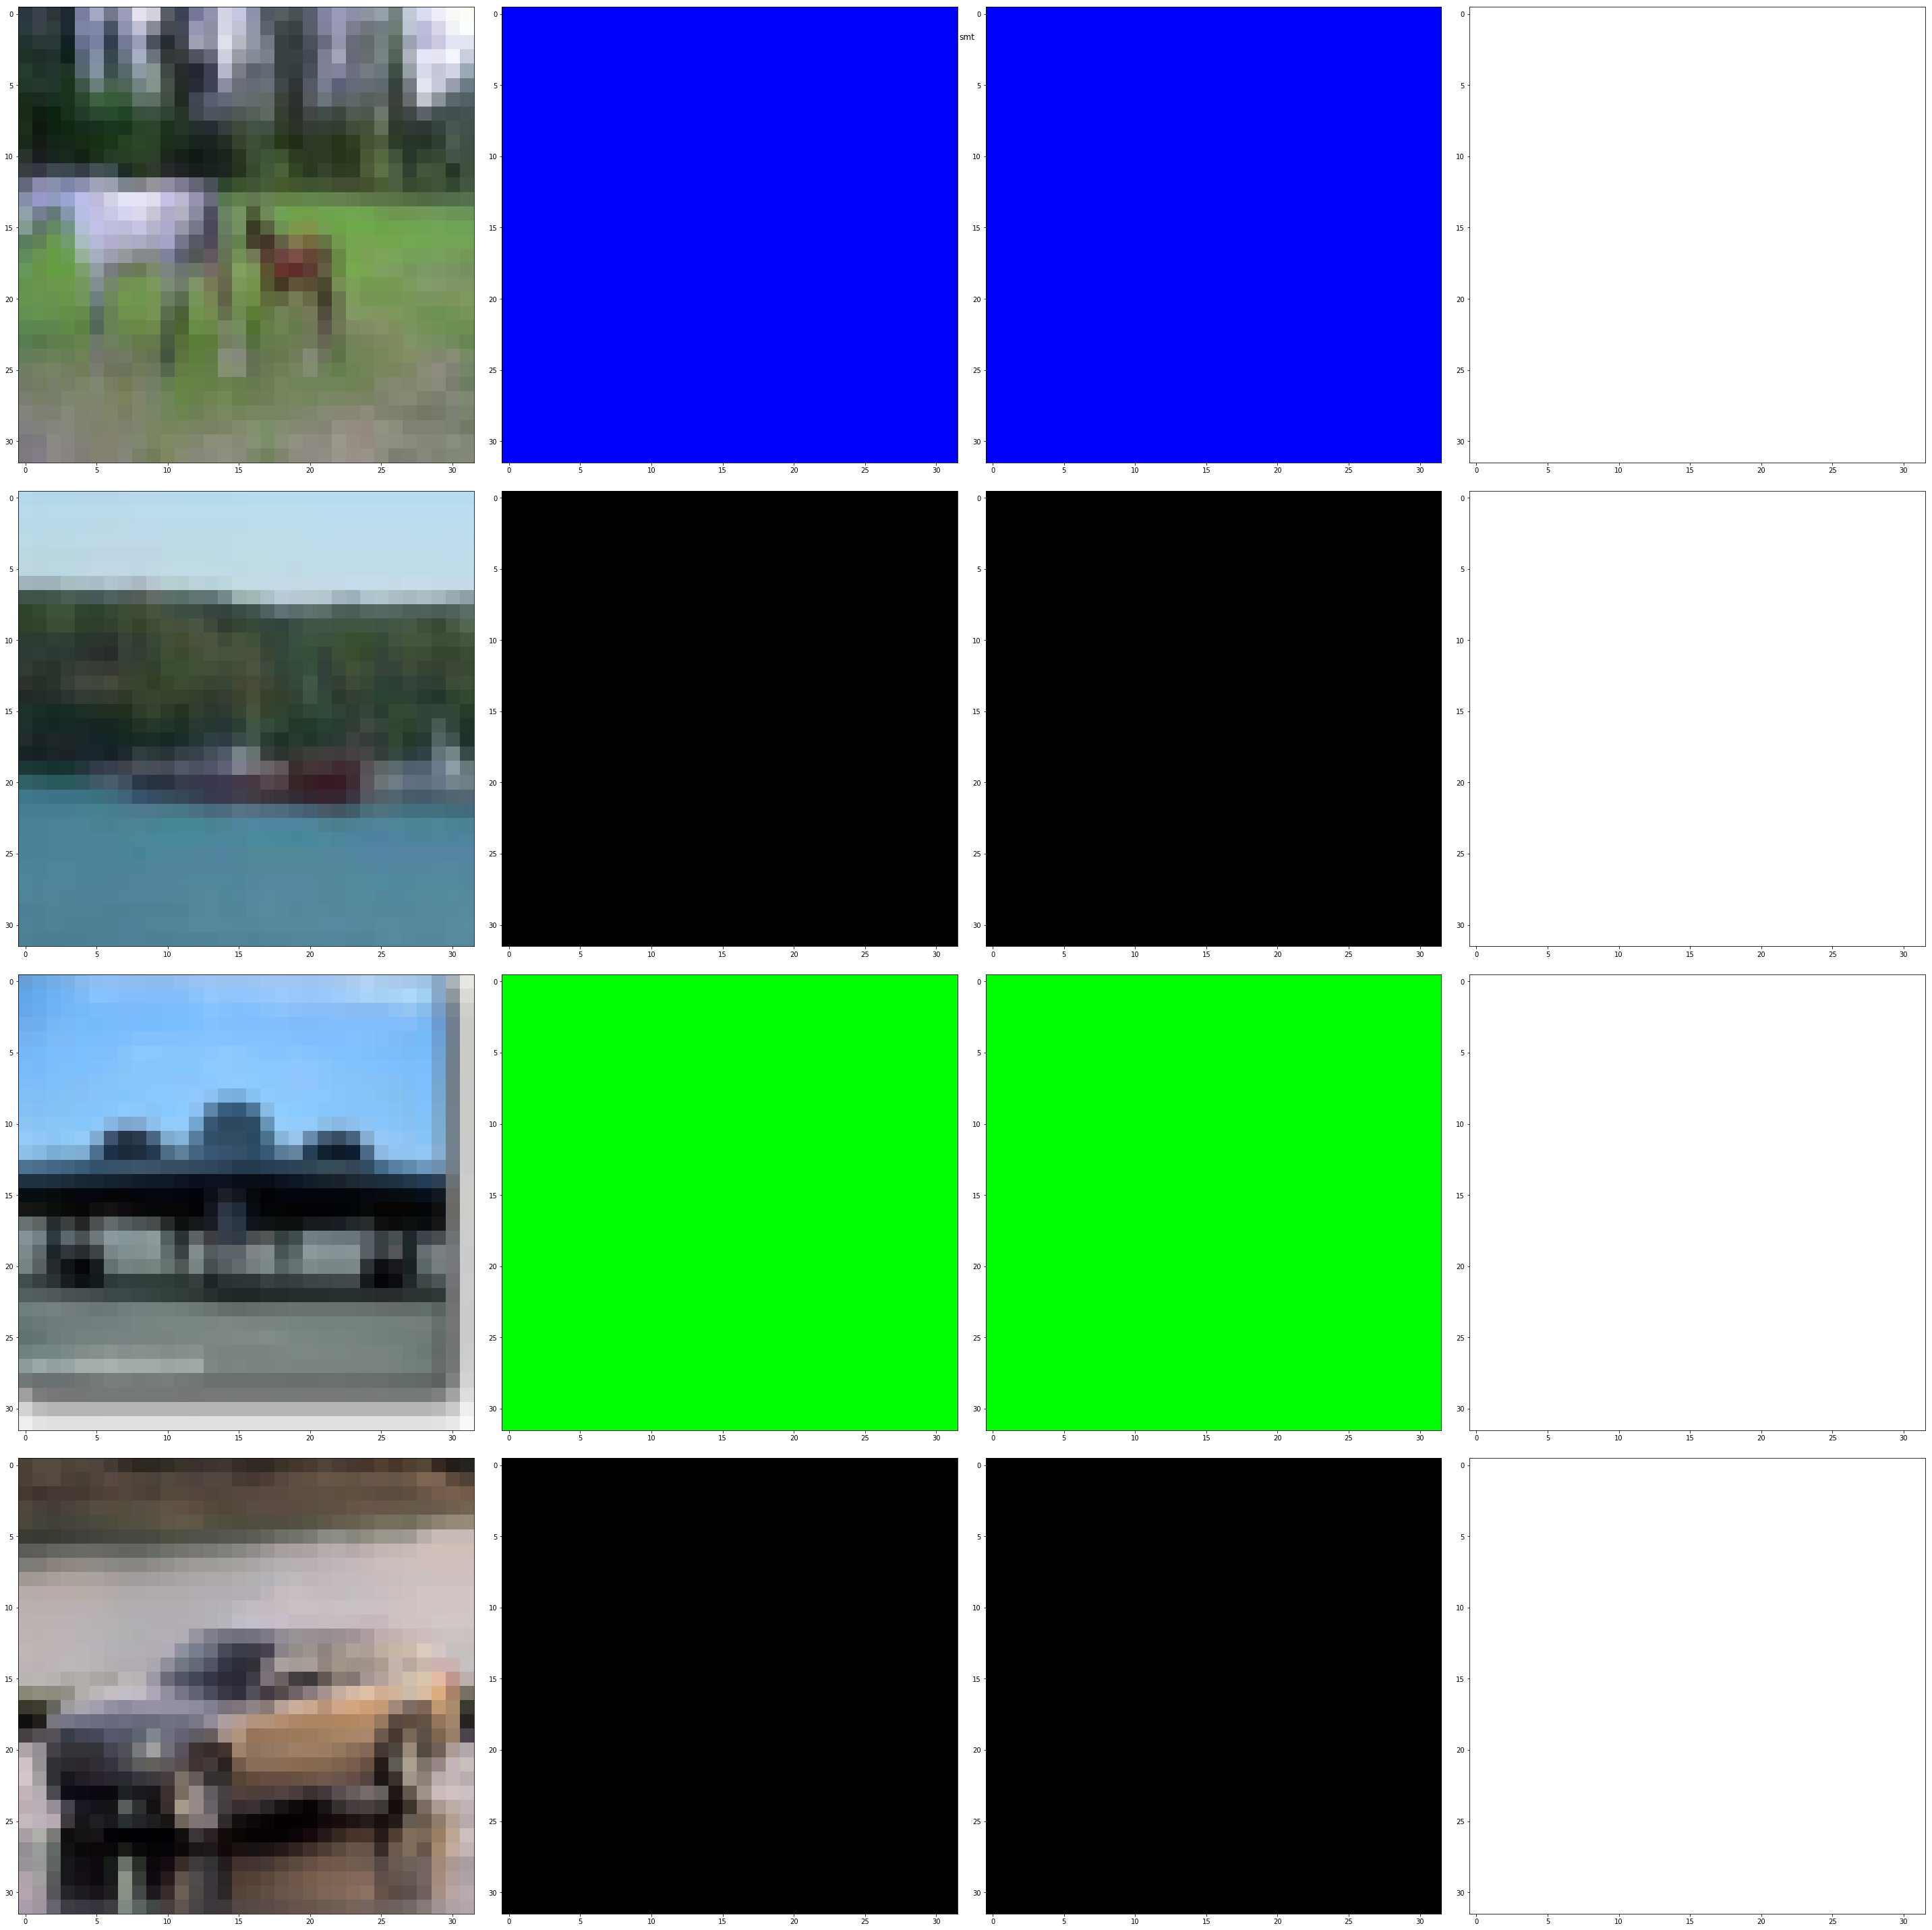

<Figure size 144x144 with 0 Axes>

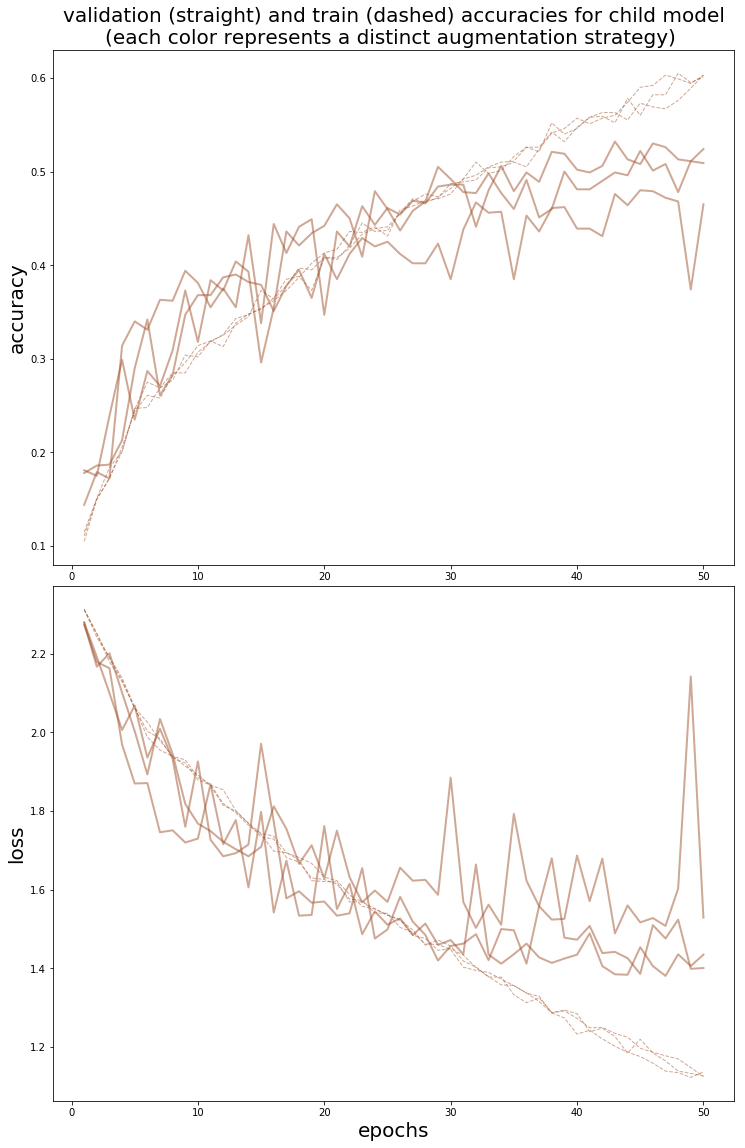

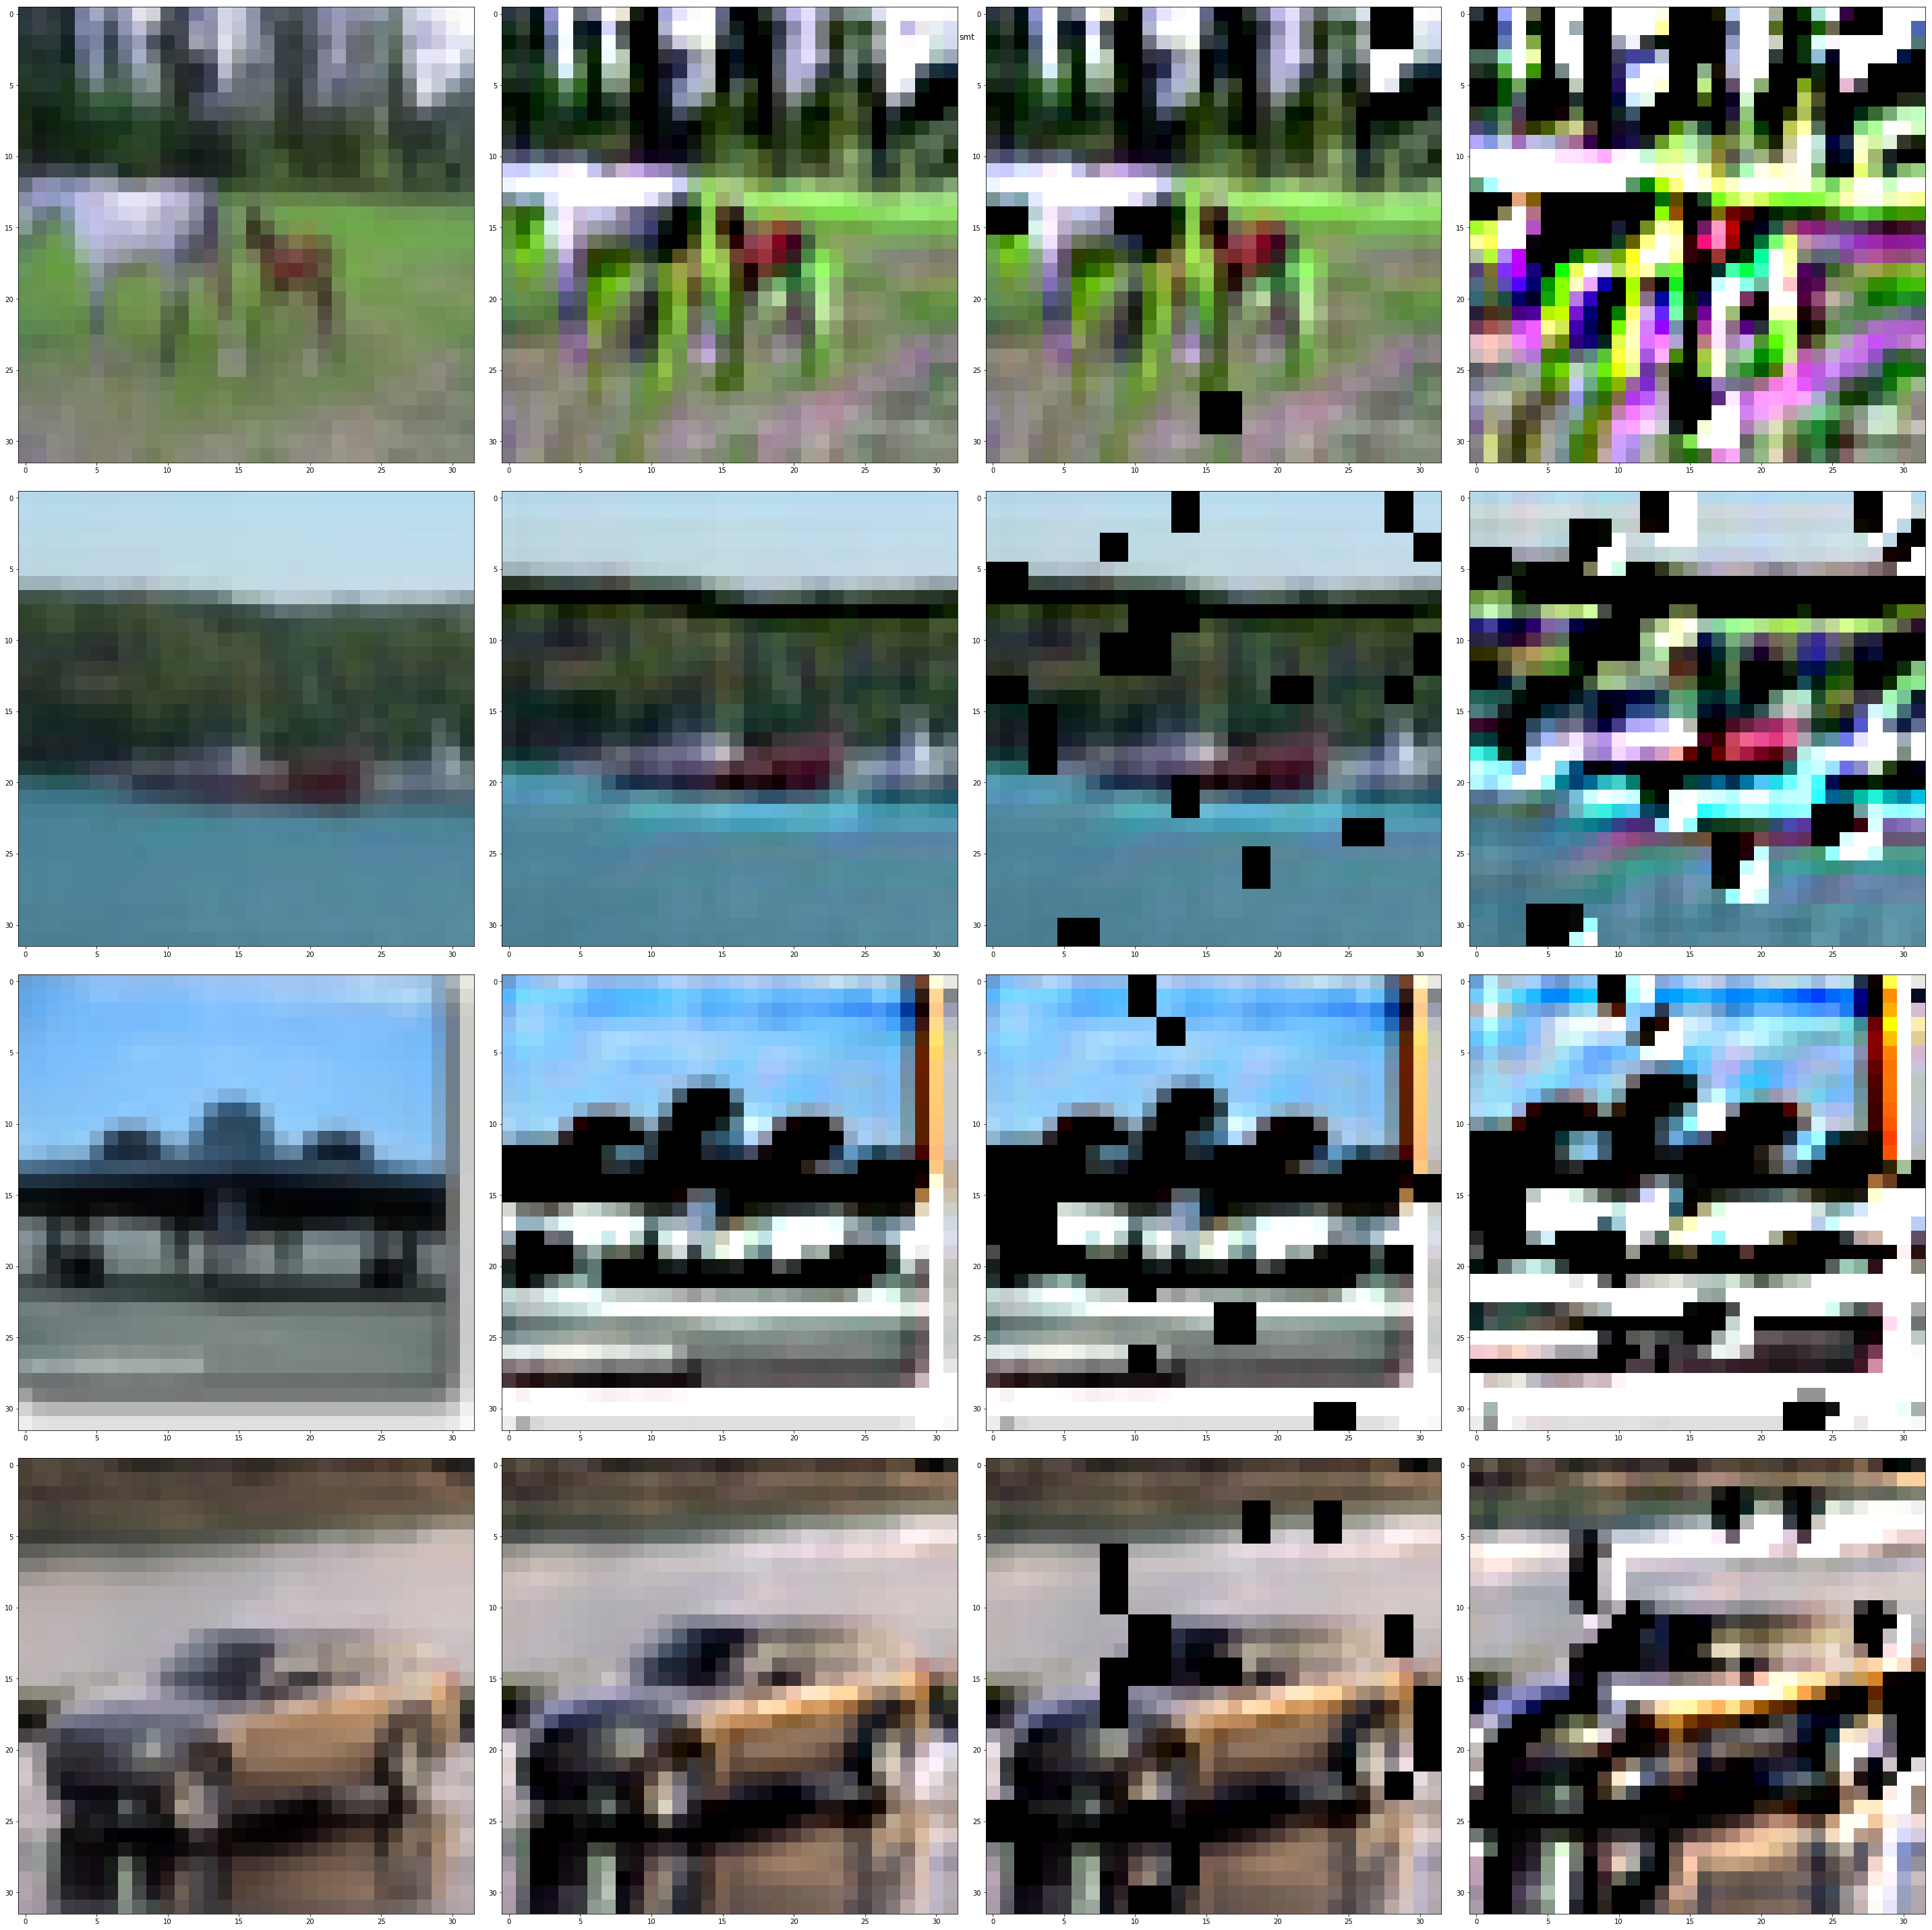

<Figure size 144x144 with 0 Axes>

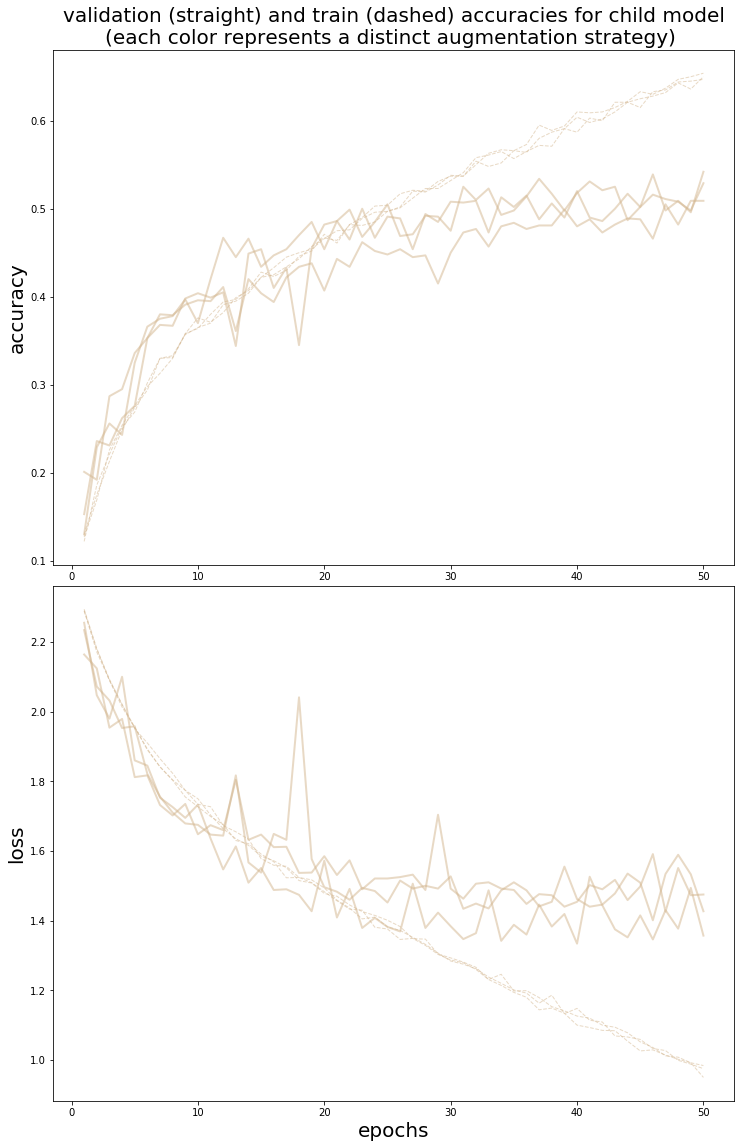

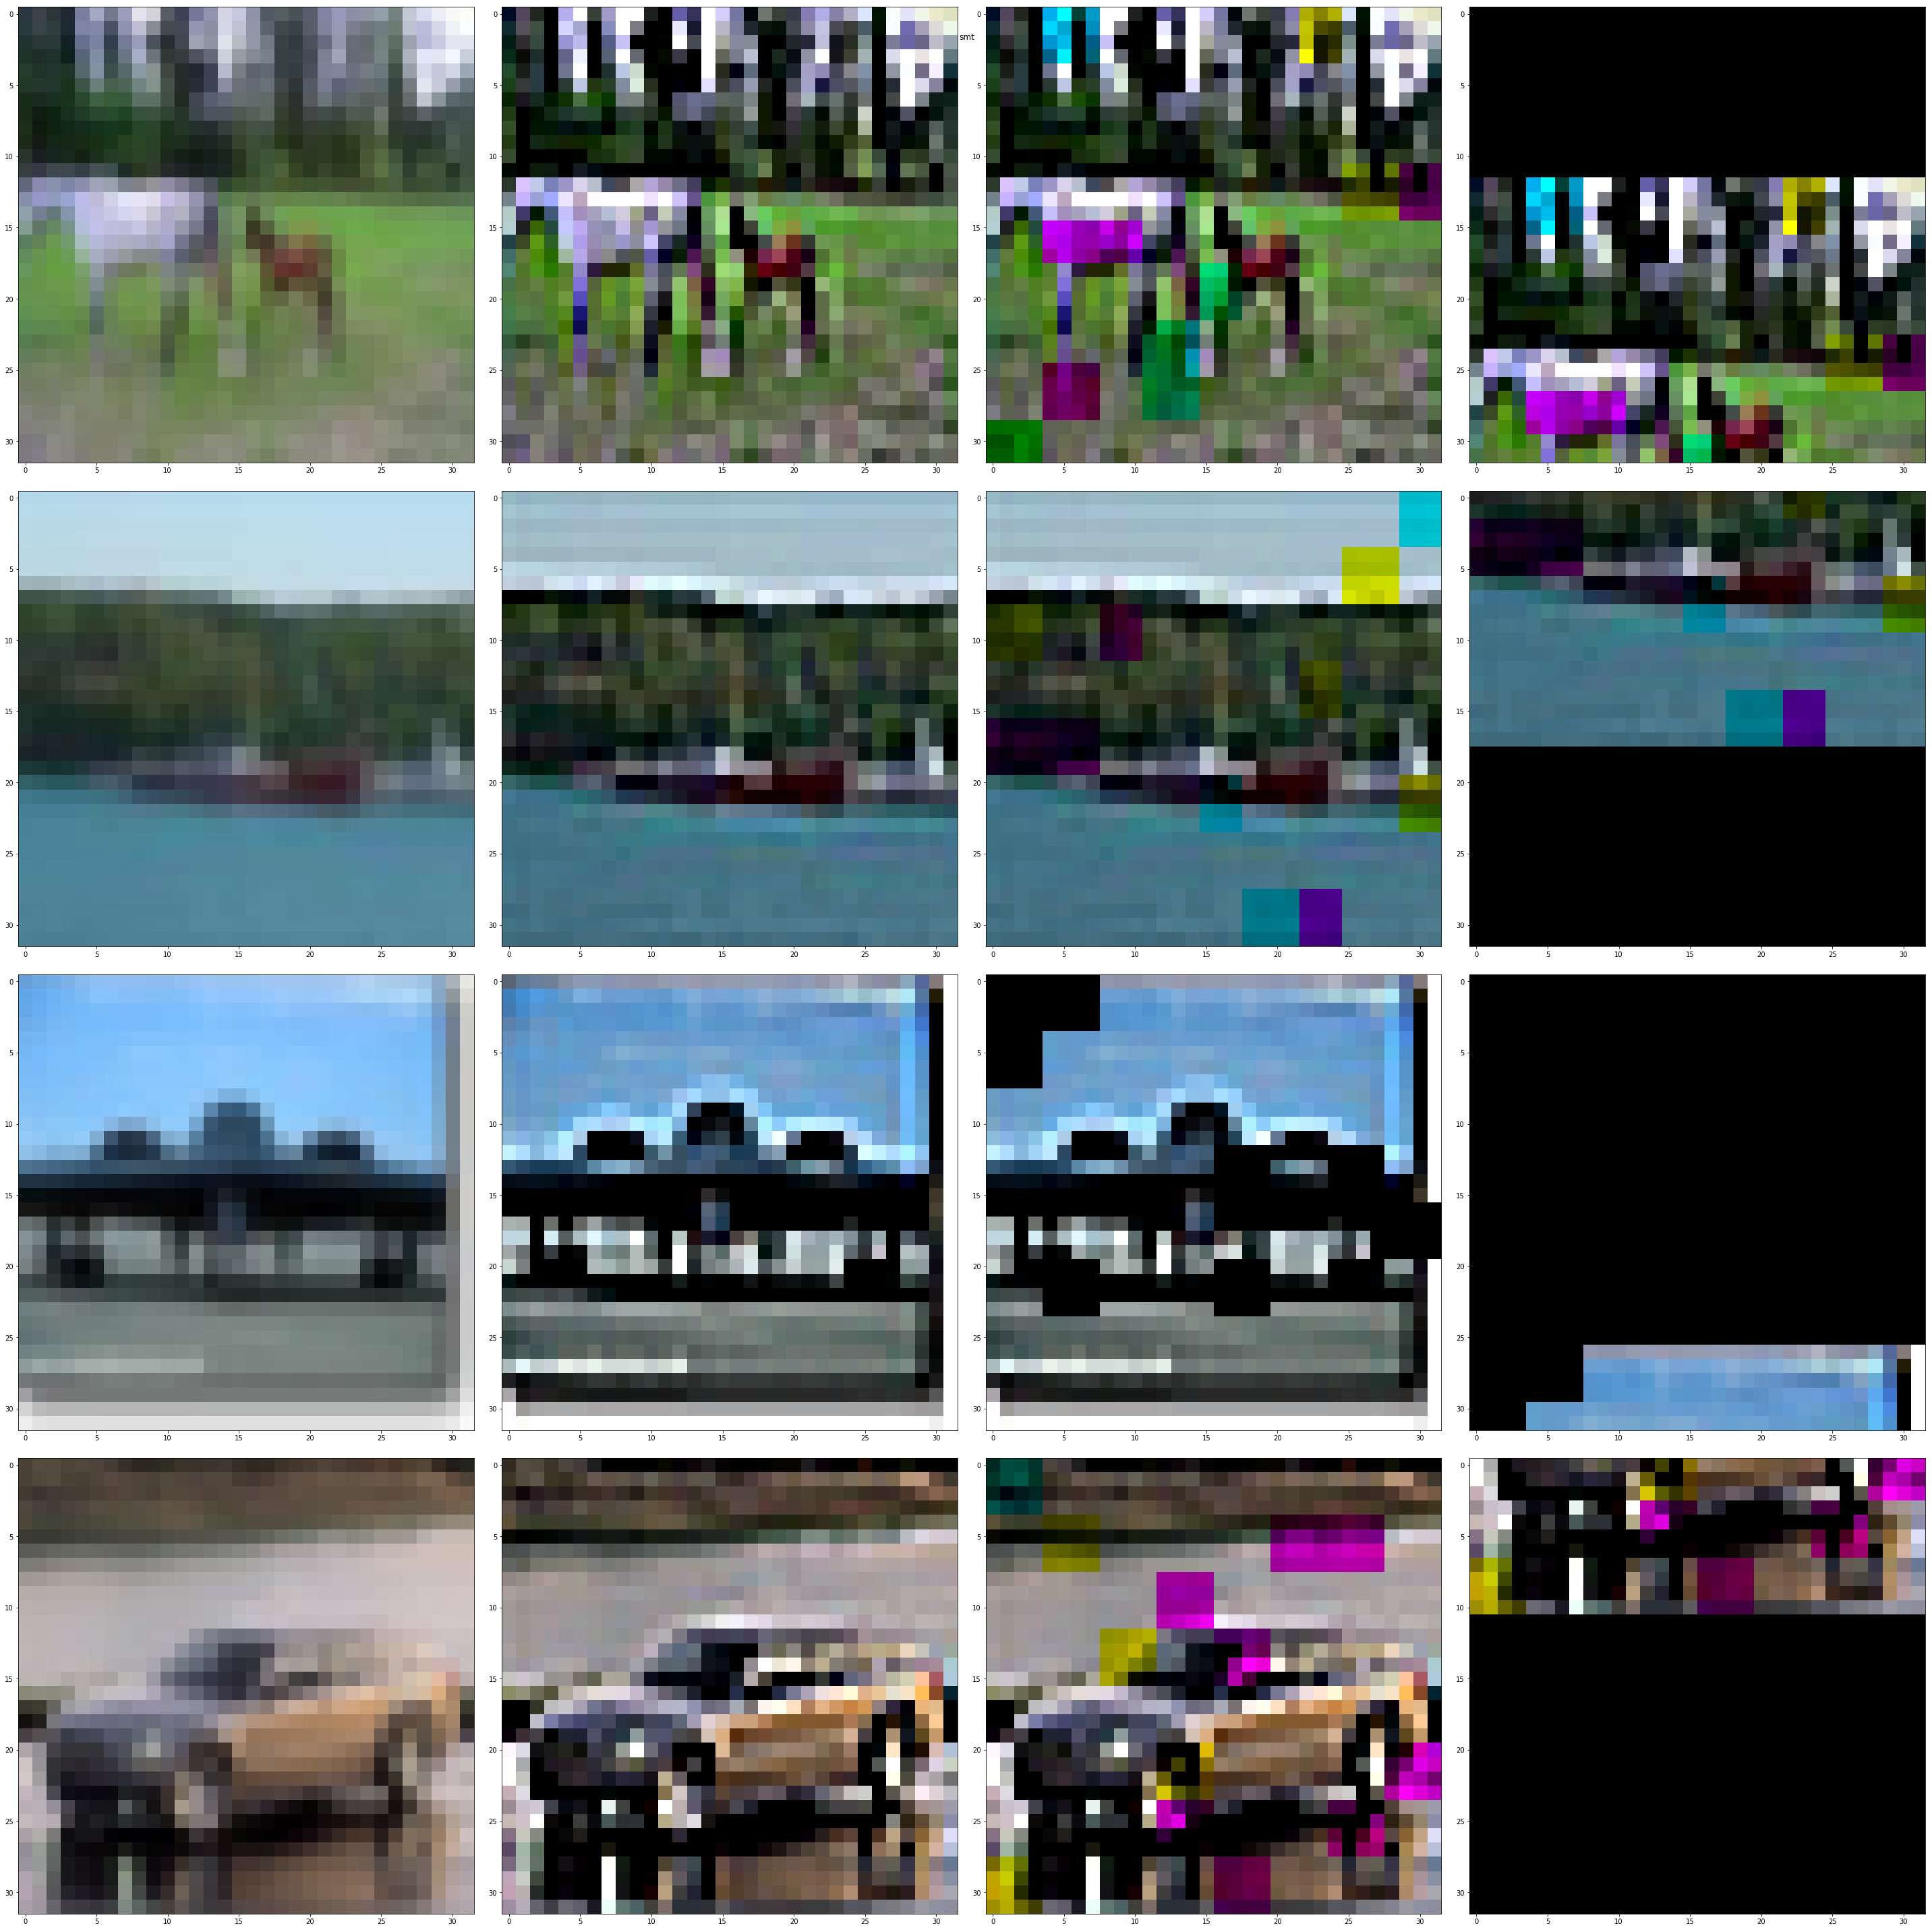

<Figure size 144x144 with 0 Axes>

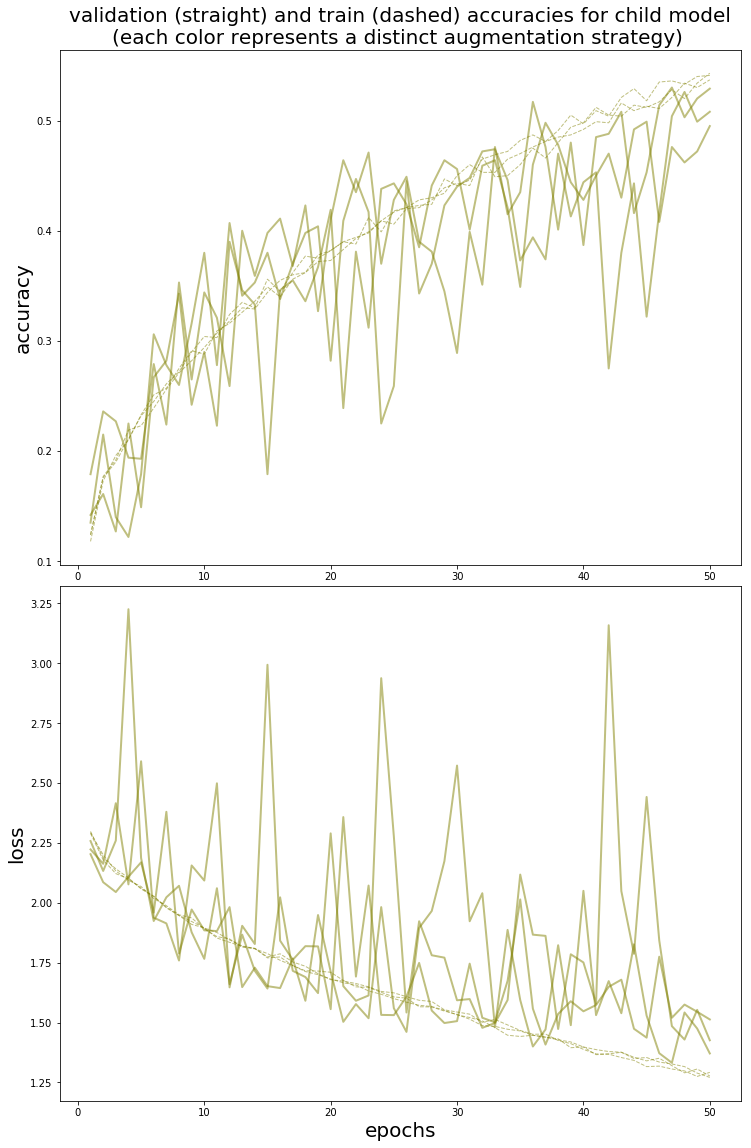

In [32]:
for i in non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward", ascending=False).trial_no.values[:5]:
    print ("trial_no:",i)
    display_augmentation_by_steps(i, non_overfitting_exp_df, data, nrows=4)
    # display_augmentation_by_trial_no(i, non_overfitting_exp_df, data, nrows=2, ncols=4)
    plt.figure(figsize=(2,2))
    plot_exp_lines(exp_df[exp_df["trial_no"]==i])

In [33]:
non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward",ascending=False)[:15]

acc   loss  val_acc  val_loss  trial_no                aug1_type  \
300    0.136  2.296    0.185     2.256         3              translate-y   
4650   0.113  2.297    0.200     2.219        32                   emboss   
21900  0.111  2.312    0.144     2.273       147                 brighten   
16050  0.130  2.290    0.153     2.234       108                   emboss   
12750  0.118  2.290    0.179     2.203        86                  sharpen   
10200  0.145  2.257    0.230     2.153        69              translate-x   
18600  0.131  2.283    0.120     2.270       125                   rotate   
7350   0.102  2.313    0.108     2.300        50                   invert   
10800  0.126  2.299    0.208     2.254        73                  dropout   
19350  0.119  2.283    0.138     2.245       130            gaussian-blur   
16350  0.126  2.294    0.167     2.240       110                  sharpen   
31200  0.124  2.297    0.130     2.261       209                 brighten   
3900   0.117  2.298    0.143     2.243        27                  dropout   
14850  0.128  2.275    0.186     2.172       100                    shear   
28650  0.111  2.312    0.160     2.288       192  additive-gaussian-noise   

       aug1_magnitude       aug2_type  aug2_magnitude       aug3_type  \
300             0.648     translate-y           0.957          rotate   
4650            0.019          emboss           0.991          clouds   
21900           0.107     translate-x           0.025             fog   
16050           0.267  coarse-dropout           1.000          emboss   
12750           0.105  coarse-dropout           0.604     translate-y   
10200           0.094  coarse-dropout           0.970         dropout   
18600           0.147  coarse-dropout           0.740         dropout   
7350            0.091  coarse-dropout           0.285         dropout   
10800           0.977  coarse-dropout           0.995          clouds   
19350           0.101     translate-x           0.863         dropout   
16350           0.101          clouds           0.035  coarse-dropout   
31200           0.673  gamma-contrast           0.369            crop   
3900            0.012  coarse-dropout           0.412             fog   
14850           0.153     translate-x           0.303         dropout   
28650           0.028          invert           0.997           shear   

       aug3_magnitude  portion  sample_no  reward  epoch  acc_overfit  \
300             0.870    0.474          1   0.535    0.0       -0.049   
4650            0.058    0.944          1   0.534    0.0       -0.087   
21900           0.035    0.387          1   0.529    0.0       -0.033   
16050           0.725    0.938          1   0.527    0.0       -0.023   
12750           0.836    0.986          1   0.526    0.0       -0.061   
10200           0.035    0.980          1   0.521    0.0       -0.085   
18600           0.003    0.400          1   0.520    0.0        0.011   
7350            0.341    0.908          1   0.519    0.0       -0.006   
10800           0.693    0.449          1   0.519    0.0       -0.082   
19350           0.008    0.924          1   0.519    0.0       -0.019   
16350           0.003    0.994          1   0.516    0.0       -0.041   
31200           0.174    0.948          1   0.516    0.0       -0.006   
3900            0.736    0.988          1   0.516    0.0       -0.026   
14850           0.024    0.997          1   0.514    0.0       -0.058   
28650           0.750    0.083          1   0.513    0.0       -0.049   

       total_acc_overfit  
300                8.202  
4650               9.118  
21900              1.935  
16050              5.564  
12750              3.231  
10200             14.093  
18600              6.904  
7350               0.598  
10800              2.233  
19350              1.841  
16350              5.336  
31200              1.702  
3900               2.644  
14850              9.916  
28650              0.651

# Top-3 nonoverfitting policies curves

trial_no    aug1_type  aug1_magnitude    aug2_type  aug2_magnitude  \
0         3  translate-y           0.648  translate-y           0.957   
1        32       emboss           0.019       emboss           0.991   
2       147     brighten           0.107  translate-x           0.025   

  aug3_type  aug3_magnitude  portion  reward  
0    rotate           0.870    0.474   0.535  
1    clouds           0.058    0.944   0.534  
2       fog           0.035    0.387   0.529

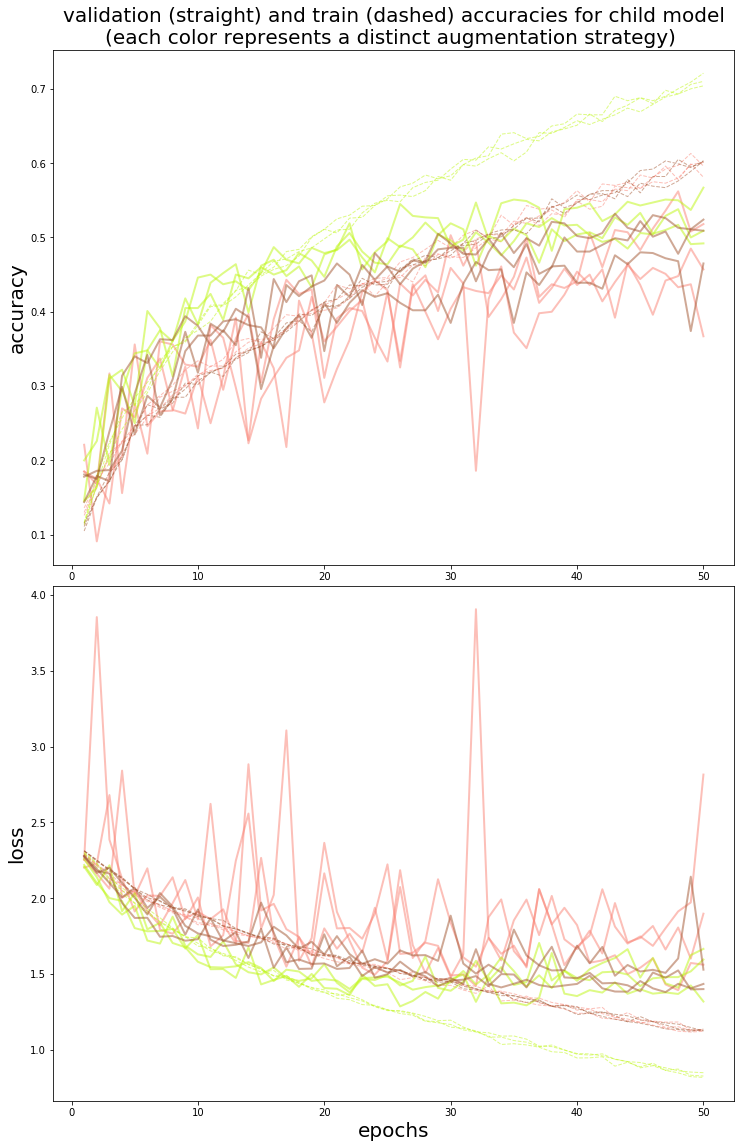

In [34]:
top3_non_overfitting = (non_overfitting_exp_df.drop_duplicates("trial_no")
                            .sort_values("reward",ascending=False)["trial_no"]
                            .values[:3]
                       )

plot_exp_lines(non_overfitting_exp_df[non_overfitting_exp_df["trial_no"].isin(top3_non_overfitting)])

In [43]:
np.array_split(np.arange(8) , 20)

[array([0]),
 array([1]),
 array([2]),
 array([3]),
 array([4]),
 array([5]),
 array([6]),
 array([7]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64)]